In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import scipy.stats

# This is the Group Project :3

#### By Sean Johnston, Luke Ryan, Anas Rasul and Kuan Horng Lai

In [2]:
data = pd.read_csv("files/ts17individual25countaveragemedianbypostcode.csv")
# This saves our csv file as a dataframe called data. We do this so that we can better understand the data through graphing etc.
data.head()
# This just shows a quick preview of the new dataframe.

Postcode  Number of individuals lodging an income tax return  \
0       800                                               5469    
1       810                                              21199    
2       812                                              11330    
3       820                                              12940    
4       822                                               5981    

   Count taxable income or loss  Average taxable income or loss  \
0                          5469                           75120   
1                         21199                           64240   
2                         11330                           62800   
3                         12940                           78787   
4                          5981                           46457   

   Median taxable income or loss  Proportion with salary or wages  \
0                          54381                             0.93   
1                          54207                             0.87   
2                          55061                             0.88   
3                          61759                             0.89   
4                          34654                             0.93   

   Count salary or wages  Average salary or wages  Median salary or wages  \
0                   5109                    76663                   57618   
1                  18481                    66038                   58351   
2                   9967                    65689                   59653   
3                  11482                    75917                   64902   
4                   5549                    44601                   33787   

   Proportion with net rent  ...  Count total business expenses  \
0                      0.15  ...                            214   
1                      0.20  ...                           1667   
2                      0.20  ...                            766   
3                      0.24  ...                            898   
4                      0.11  ...                            222   

   Average total business expenses  Median total business expenses  \
0                            53482                           11214   
1                            66482                           13476   
2                            54295                           15664   
3                            53516                           13038   
4                            59281                           20346   

   Proportion with net tax  Count net tax  Average net tax  Median net tax  \
0                     0.84           4609            23516           12699   
1                     0.81          17167            18229           12929   
2                     0.83           9350            16847           12805   
3                     0.85          10994            24297           14956   
4                     0.67           3985            12326            7308   

   Count total super member accounts balance  \
0                                       7321   
1                                      24913   
2                                      13588   
3                                      15704   
4                                       9155   

   Average total super member accounts balance  \
0                                        71340   
1                                       111650   
2                                       116002   
3                                       134488   
4                                        44426   

   Median total super member accounts balance  
0                                       12484  
1                                       39517  
2                                       47640  
3                                       44118  
4                                        9277  

[5 rows x 34 columns]

In [3]:
data.isna().sum()
# This returns the number of missing values in each columns next to the title of the column. 

Postcode                                              0
Number of individuals lodging an income tax return    0
Count taxable income or loss                          0
Average taxable income or loss                        0
Median taxable income or loss                         0
Proportion with salary or wages                       0
Count salary or wages                                 0
Average salary or wages                               0
Median salary or wages                                0
Proportion with net rent                              0
Count net rent                                        0
Average net rent                                      0
Median net rent                                       0
Count total income or loss                            0
Average total income or loss                          0
Median total income or loss                           0
Count total deductions                                0
Average total deductions                        

## The average salary and wages according to postcode

In [4]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average salary or wages', figsize=(40,20), grid=True)
plt.title('Average salary and wages according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Salary Or Wages")
# This time, we are exploring thhe relationship between Average salary/wages and postcodes.

Text(0, 0.5, 'Average Salary Or Wages')

In [5]:
plt.rcParams['axes.labelsize'] = 30
# sets the label size
lineplot = data.plot(x='Postcode', y='Count net tax', figsize=(40,20), grid=True)
# Defines which columns we're using as x and y-values, as well as the size of the figure.
plt.title('net tax based on postcode', fontsize=60)
# Sets the title of the graph, as well as the font size of said title.
plt.tick_params(axis='both', labelsize=25)
# Sets the size of the ticks (1000, 2000, 50000 etc.) to 25.
lineplot.set_ylabel("net tax")
# Sets a specific label for the y-axis.

Text(0, 0.5, 'net tax')

#### We check the data see if we have any NaN value in each fields.

In [6]:
data['Postcode'].head(1)
print(data['Postcode'].head(1))
print(data['Postcode'].tail(1))
# This prints both the first and last values of the Postcode column, next to their index.

0    800
Name: Postcode, dtype: int64
2471    7470
Name: Postcode, dtype: int64


**Here, we check the first postcode given in the csv file, as well as the last. This information will be used to verify what we're about to do below.**

In [7]:
data['Postcode'].unique()
# This code is being used to ensure there's no redundancy in the postcodes provided.

array([ 800,  810,  812, ..., 7468, 7469, 7470], dtype=int64)

#### Then we check the uniqueness of the postcodes and there was no redundancy in it (it says every value from 800 to 7470 was unique, which are the values we just discovered were the first and last postcodes in the csv file). This means every postcode given is unique.

In [8]:
data.shape

(2472, 34)

## The average taxable income or loss according to postcode

Text(0, 0.5, 'Average Taxable Income Or Loss')

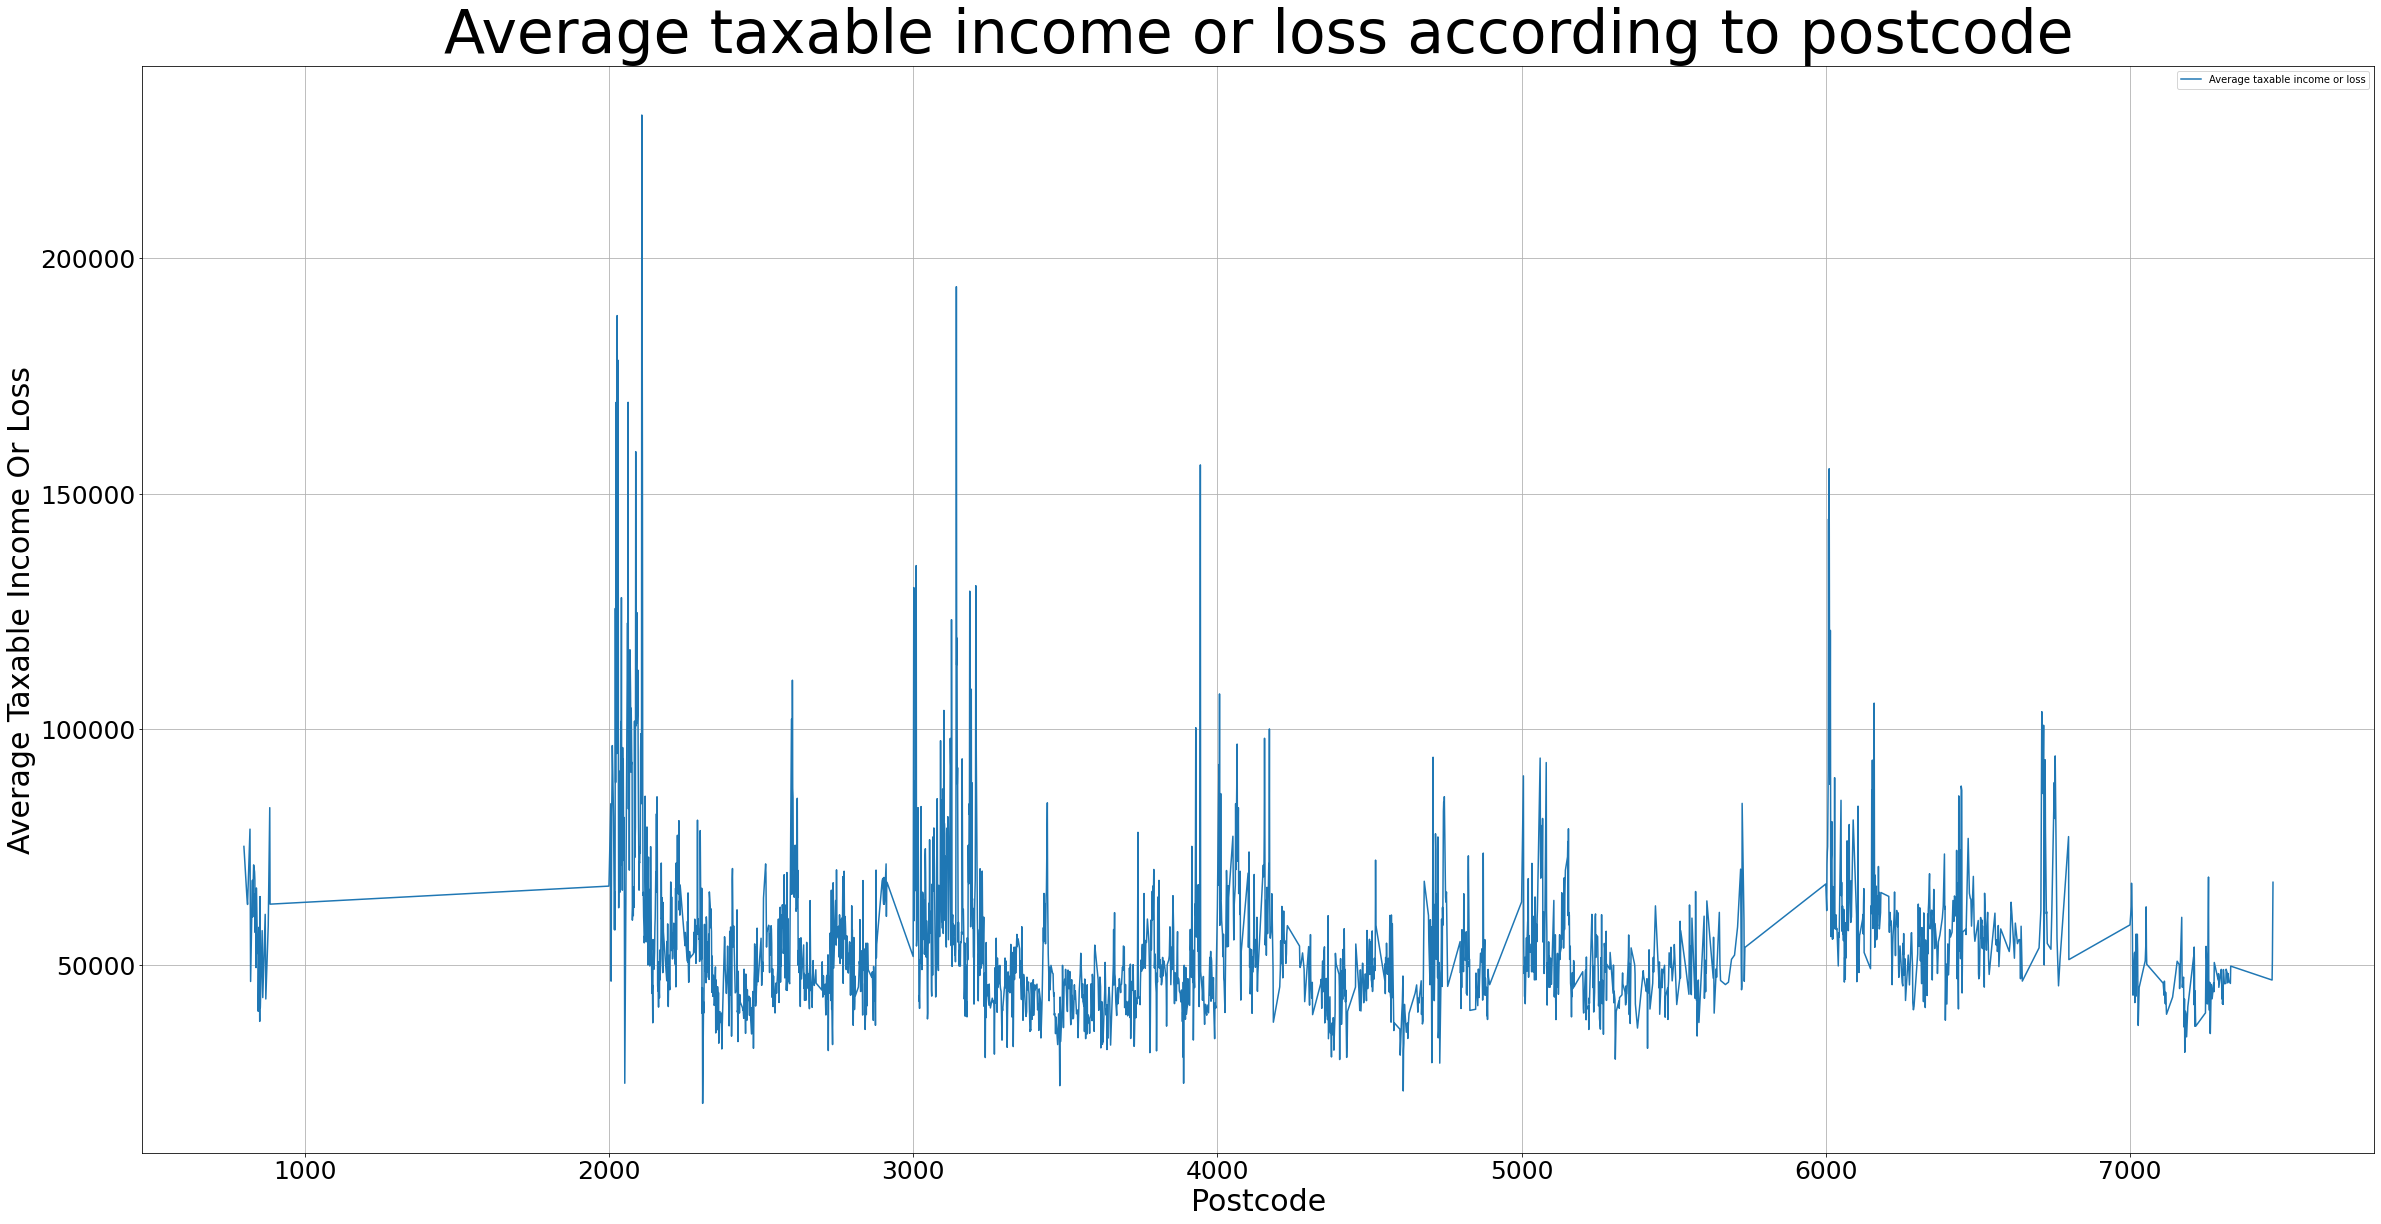

In [9]:
plt.rcParams['axes.labelsize'] = 30
# sets the label size
lineplot = data.plot(x='Postcode', y='Average taxable income or loss', figsize=(40,20), grid=True)
# Defines which columns we're using as x and y-values, as well as the size of the figure.
plt.title('Average taxable income or loss according to postcode', fontsize=60)
# Sets the title of the graph, as well as the font size of said title.
plt.tick_params(axis='both', labelsize=25)
# Sets the size of the ticks (1000, 2000, 50000 etc.) to 25.
lineplot.set_ylabel("Average Taxable Income Or Loss")
# Sets a specific label for the y-axis.

# This precise structure was applied to every other line graph in this document in order for consistency and presentability.

In [10]:
average_taxable_income_or_loss = data[['Postcode','Average taxable income or loss']]
# This cuts out a section of the dataframe with only the postcode and average taxable income/loss columns in its own dataframe.
average_taxable_income_or_loss.sort_values(by=['Average taxable income or loss']).head(10)
# We want sort by Average taxable income or loss. To make sure this works, we are first printing the first 10 values.

Postcode  Average taxable income or loss
266       2308                           20589
1597      4611                           23225
1009      3482                           24346
72        2052                           24855
1248      3889                           24863
1651      4731                           29127
1628      4705                           29223
1501      4402                           29891
1924      5308                           29974
862       3237                           30317

In [11]:
average_taxable_income_or_loss.sort_values(by=['Average taxable income or loss']).tail(10)
# Now we do the same with the bottom 10.

Postcode  Average taxable income or loss
119       2110                          156069
1289      3944                          156079
100       2088                          158897
49        2028                          160378
44        2023                          169334
76        2063                          169365
51        2030                          178282
48        2027                          187769
777       3142                          193904
118       2108                          230330

In [12]:
average_taxable_income_or_loss.sort_values(by=['Average taxable income or loss']).describe()
# This gives us some statistics about our newly sorted data.

Postcode  Average taxable income or loss
count  2472.000000                     2472.000000
mean   4094.410599                    54607.265372
std    1496.667668                    16639.502665
min     800.000000                    20589.000000
25%    2839.750000                    44954.750000
50%    3869.500000                    51110.000000
75%    5165.250000                    59479.000000
max    7470.000000                   230330.000000

## The average taxable income or loss according to postcode sorted

Text(0, 0.5, 'Average Taxable Income Or Loss')

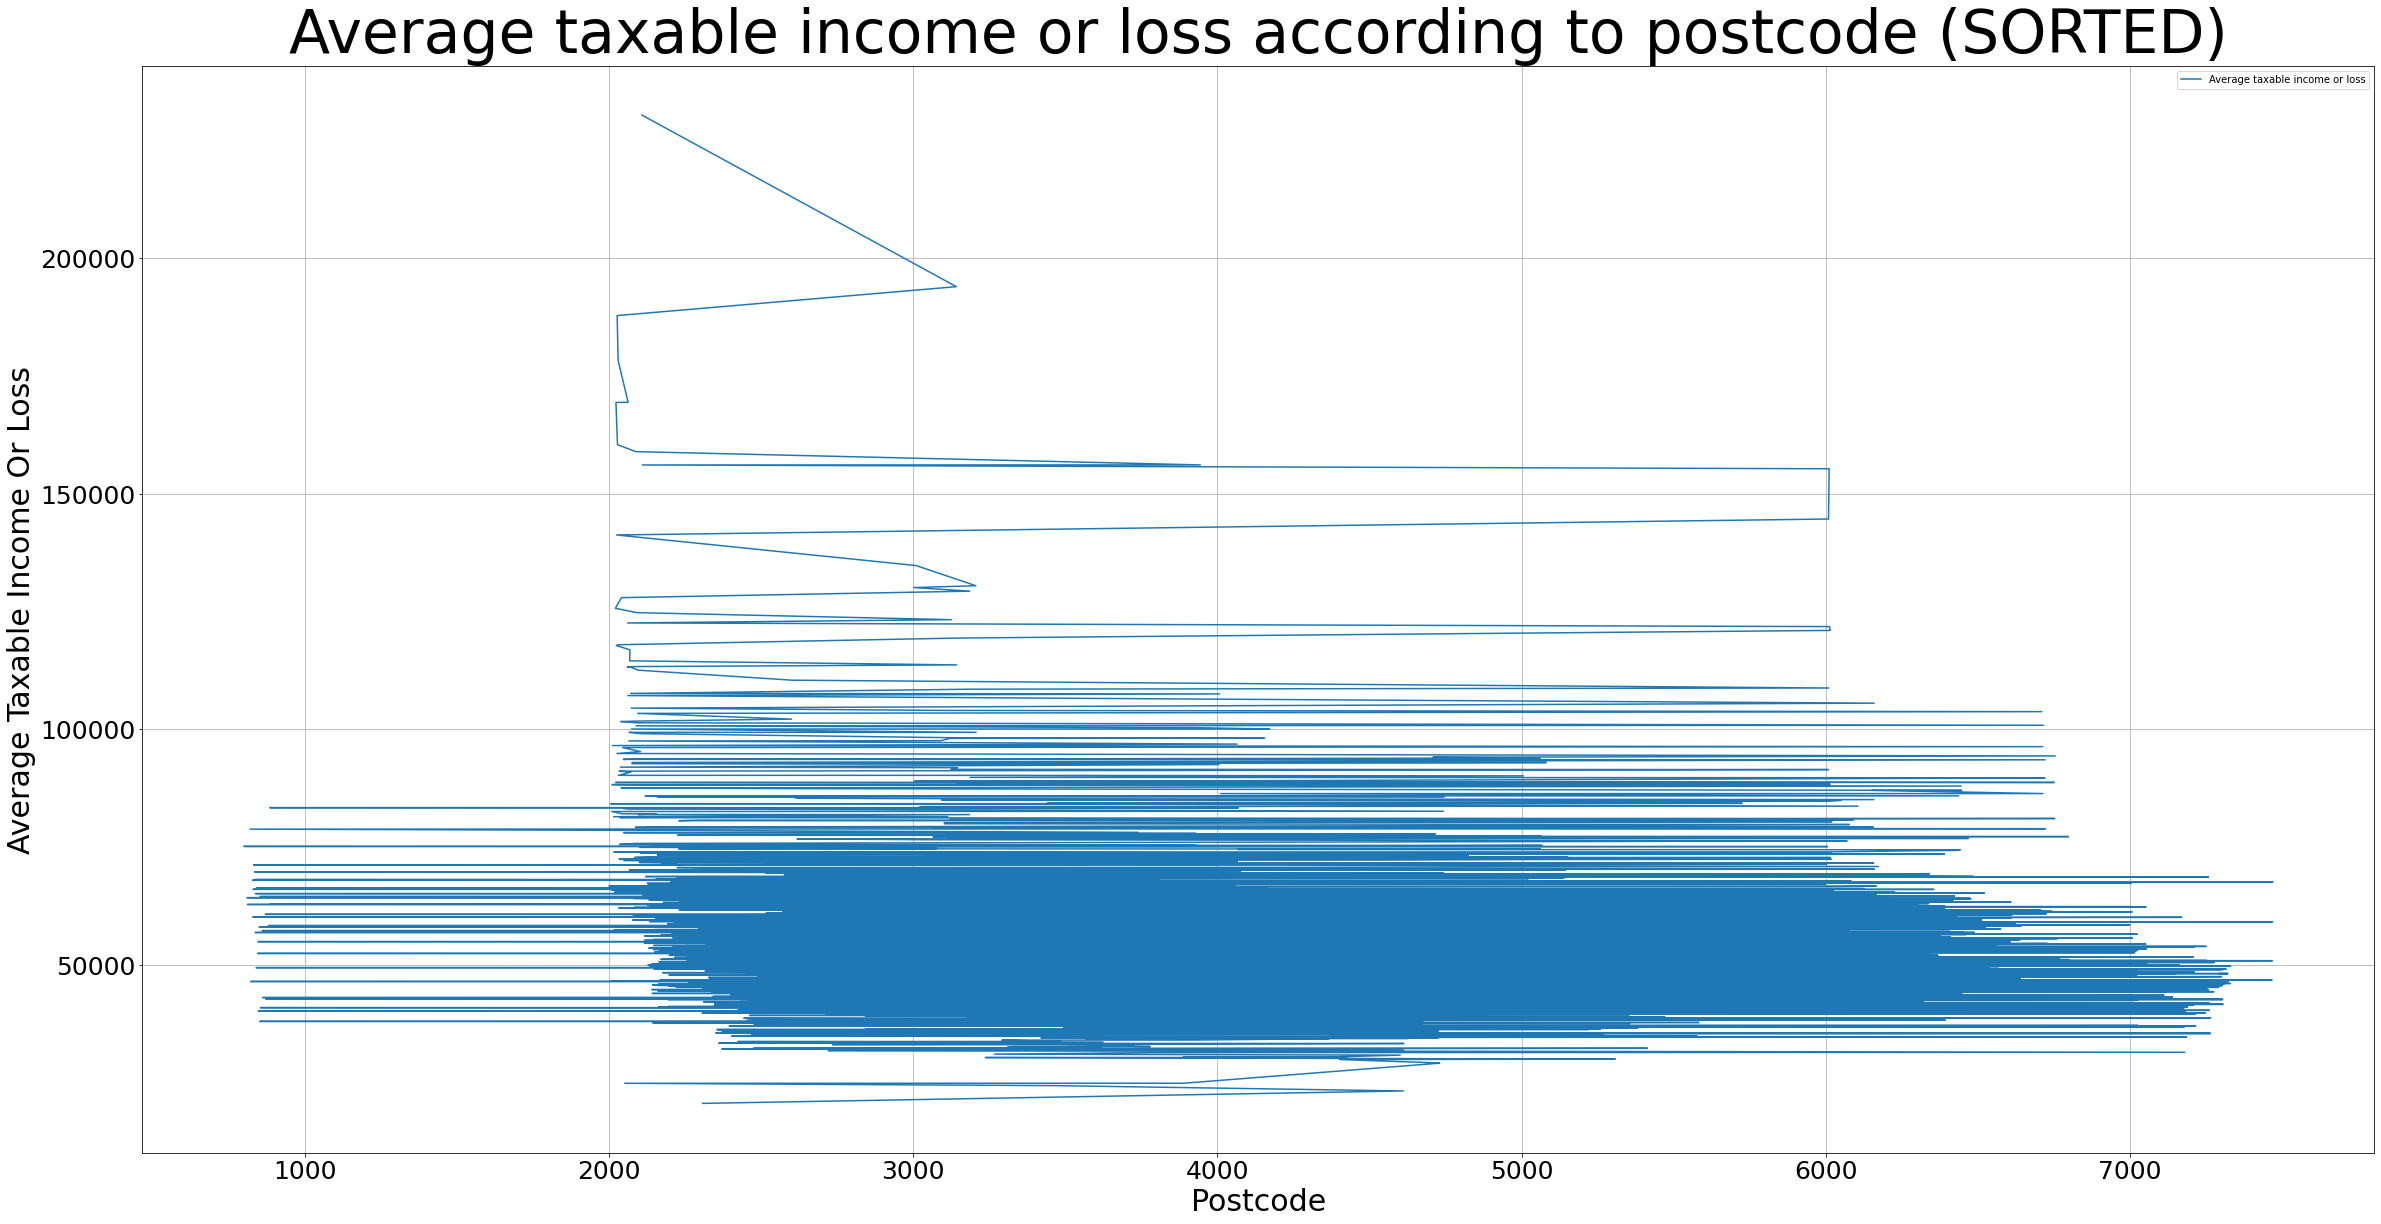

In [13]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_taxable_income_or_loss.sort_values(by=['Average taxable income or loss']).plot(x='Postcode', y='Average taxable income or loss', figsize=(40,20), grid=True)
# Same graph as before, except this time it is sorted to create a more readable and meaningful graph.
plt.title('Average taxable income or loss according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Taxable Income Or Loss")

#### Here we have a quick look on the average salary or wages according to postcode on a line graph

In [14]:
average_salary = data[['Postcode','Average salary or wages']]
# Same as before, we are cutting a part of the dataframe into its own dataframe, this time with average salary/wages.
average_salary.sort_values(by=['Average salary or wages']).head(10)
# Agaim, we test sorting by printing out the first 10 sorted values...

Postcode  Average salary or wages
266       2308                    18218
72        2052                    24801
2031      5650                    25963
1013      3491                    27028
510       2668                    29607
1020      3507                    29846
2255      6393                    30021
1009      3482                    30318
2270      6425                    30437
2240      6352                    30464

In [15]:
average_salary.sort_values(by=['Average salary or wages']).tail(10)
# ...and then the last 10.

Postcode  Average salary or wages
103       2092                   106335
46        2025                   106407
44        2023                   106510
837       3206                   107302
2348      6716                   107601
62        2041                   108501
48        2027                   112438
100       2088                   126657
76        2063                   127245
662       3010                   141262

#### While the people from the postcode 2308 pay an Average net tax of $7,870 

In [16]:
data[266:267]
# prints data at the given position.

Postcode  Number of individuals lodging an income tax return  \
266      2308                                                144    

     Count taxable income or loss  Average taxable income or loss  \
266                           144                           20589   

     Median taxable income or loss  Proportion with salary or wages  \
266                          16074                             0.91   

     Count salary or wages  Average salary or wages  Median salary or wages  \
266                    131                    18218                   10799   

     Proportion with net rent  ...  Count total business expenses  \
266                      0.02  ...                              2   

     Average total business expenses  Median total business expenses  \
266                            25558                           25558   

     Proportion with net tax  Count net tax  Average net tax  Median net tax  \
266                     0.29             42             7870            1333   

     Count total super member accounts balance  \
266                                        188   

     Average total super member accounts balance  \
266                                        20205   

     Median total super member accounts balance  
266                                        1415  

[1 rows x 34 columns]

#### The people from postcode 3010 have an average net tax of $61,126 

In [17]:
data[662:663]

Postcode  Number of individuals lodging an income tax return  \
662      3010                                                 51    

     Count taxable income or loss  Average taxable income or loss  \
662                            51                          134715   

     Median taxable income or loss  Proportion with salary or wages  \
662                          73287                             0.84   

     Count salary or wages  Average salary or wages  Median salary or wages  \
662                     43                   141262                   78001   

     Proportion with net rent  ...  Count total business expenses  \
662                      0.16  ...                              4   

     Average total business expenses  Median total business expenses  \
662                             5121                            5635   

     Proportion with net tax  Count net tax  Average net tax  Median net tax  \
662                     0.76             39            61126           20599   

     Count total super member accounts balance  \
662                                         64   

     Average total super member accounts balance  \
662                                       297369   

     Median total super member accounts balance  
662                                       40648  

[1 rows x 34 columns]

### The data has been sorted in the ascending order. From here we can see that the lowest and highest average salary or wages are 18218 with postcode 2308 and 141262 with postcode 3010. We can observe that the 3010 postcode belongs to the University of Melbourne, and the 2308 postcode belongs to The University of New Castle 


In [18]:
average_salary.sort_values(by=['Average salary or wages']).describe()

Postcode  Average salary or wages
count  2472.000000              2472.000000
mean   4094.410599             54303.484223
std    1496.667668             12632.331614
min     800.000000             18218.000000
25%    2839.750000             45735.500000
50%    3869.500000             51924.500000
75%    5165.250000             60250.000000
max    7470.000000            141262.000000

#### This shows:
* How many postcodes there are
* The average salaray
* The lowest salary or wage was 18218 that year
* The highest salary or wage was 141262 that year

## The average salary and wages according to postcode sorted

Text(0, 0.5, 'Average Salary Or Wages')

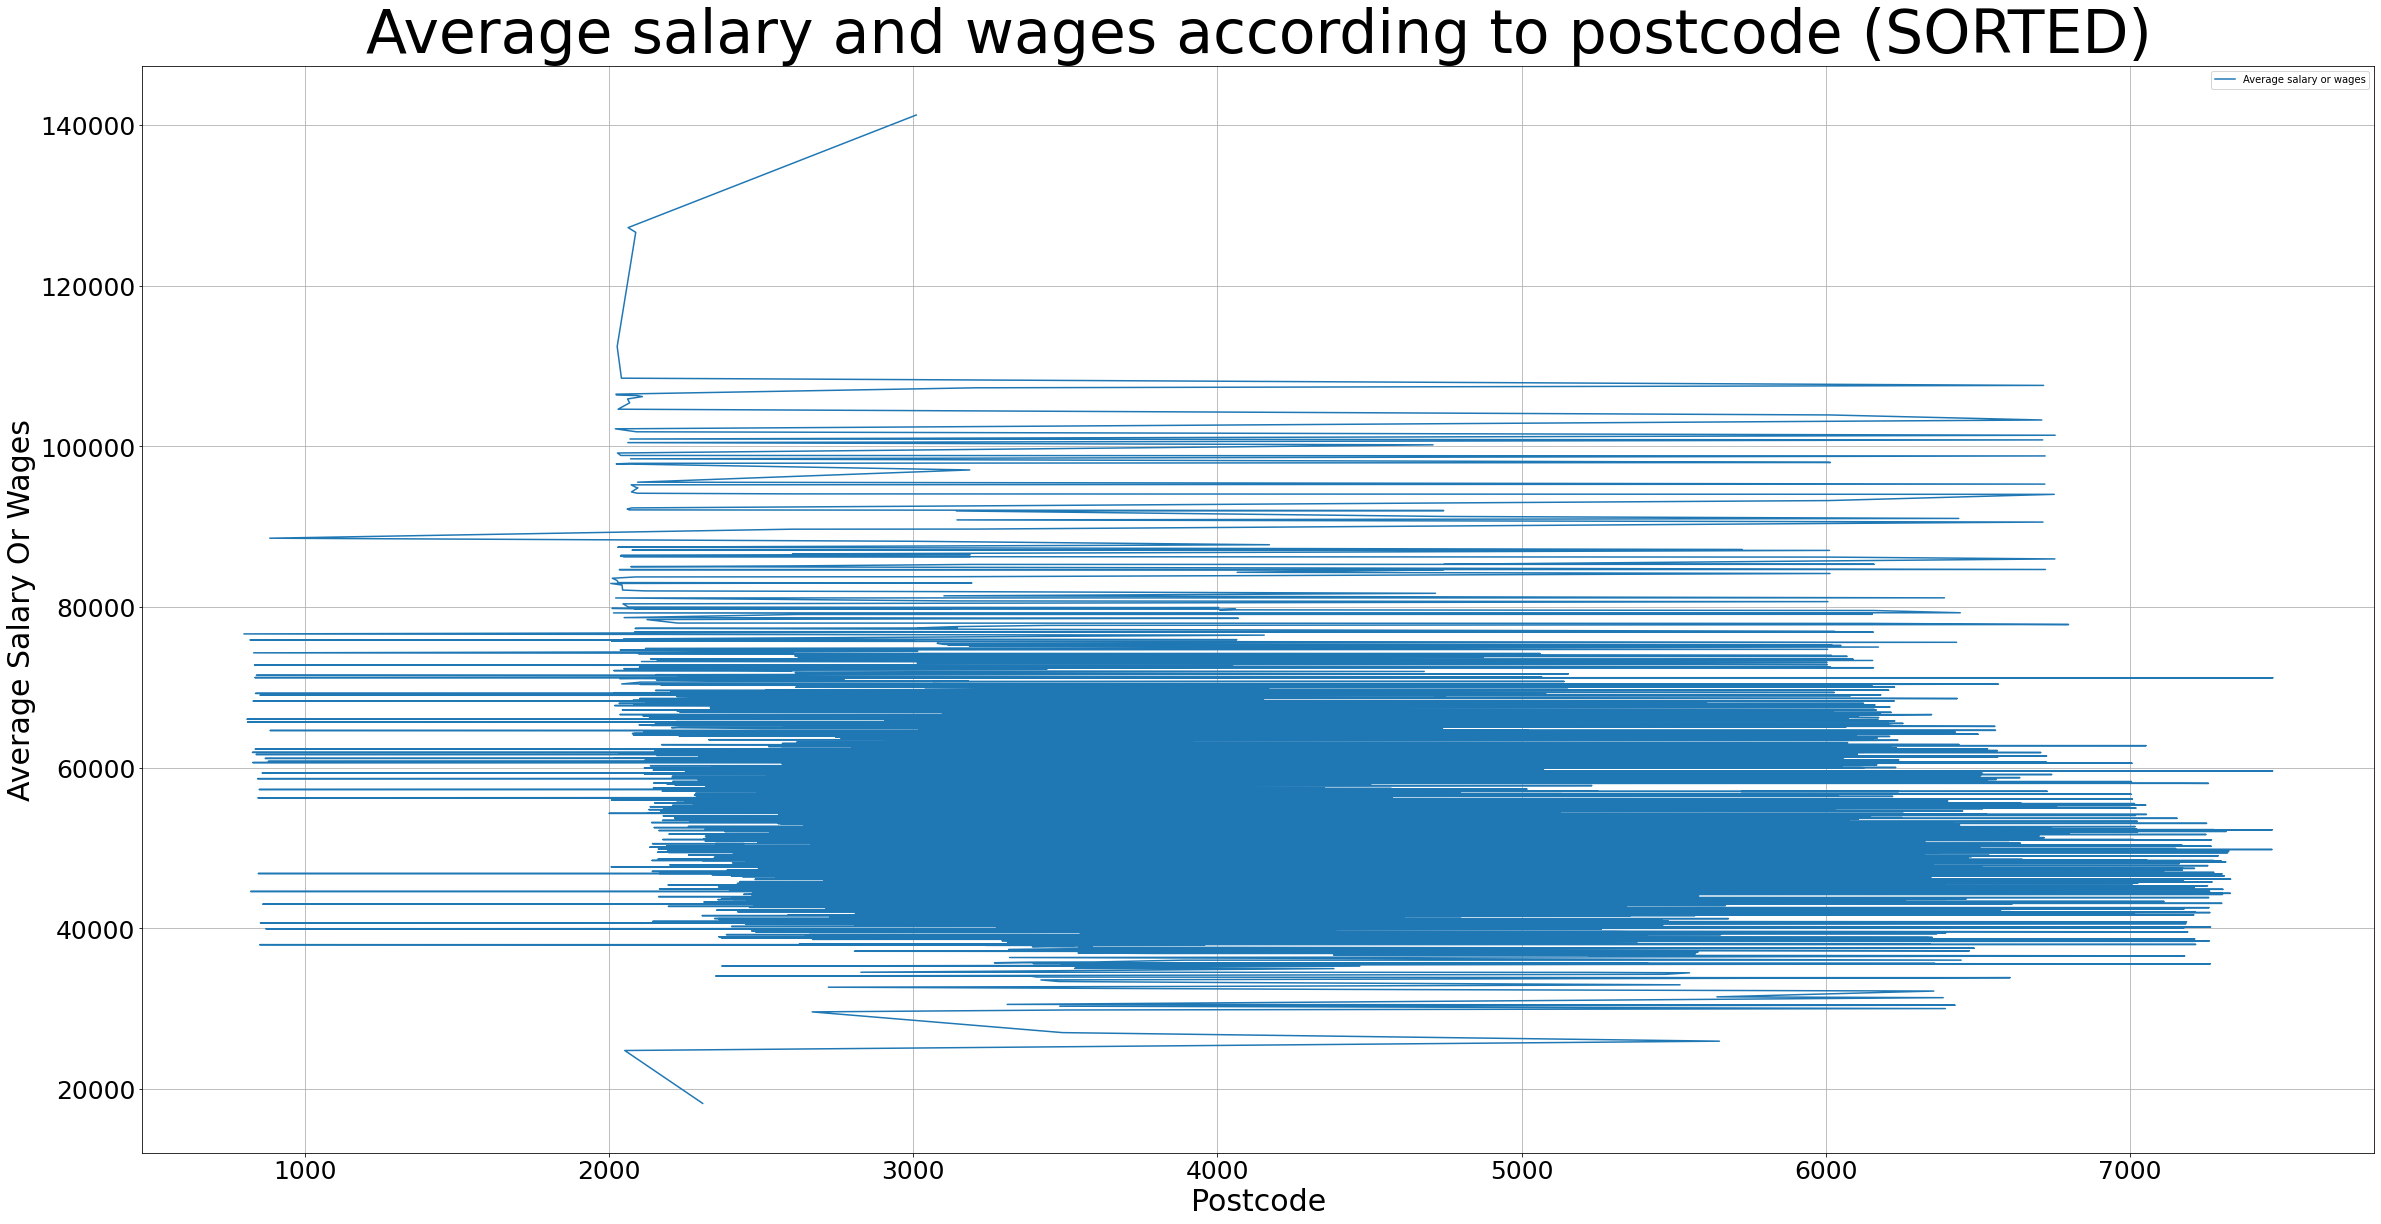

In [19]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_salary.sort_values(by=['Average salary or wages']).plot(x='Postcode', y='Average salary or wages', figsize=(40,20), grid=True)
plt.title('Average salary and wages according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Salary Or Wages")

#### As we see most of them who live in between postcode 2000 and 7000 have the average salary or wages around 3000 to 7000.

## Average net rent according to postcode
[Net rent](https://www.edmontoncommercial.com/net-rent-gross-rent-net-effective-rent/) generally implies that the tenant pays rent plus property taxes, building insurance, common area maintenance and management fees.

In [20]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average net rent', figsize=(40,20), grid=True)
plt.title('Average net rent according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Net Rent")

Text(0, 0.5, 'Average Net Rent')

#### According to this graph, rent was moderate around -10000 to 10000 with distintive net rents at postcode 7215 where the rent was -21788. There were also postcodes 6423 and 7213 where they had the highest net rents at 23940 and 25314 per year.

** i dont think this is right **

In [21]:
average_net_rent = data[['Postcode','Average net rent']]
average_net_rent.sort_values(by=['Average net rent']).head(10)

Postcode  Average net rent
2424      7215            -21788
1672      4801            -17253
1520      4425            -14431
728       3084            -13014
2349      6718            -11949
2134      6126            -11206
2351      6721            -11187
2342      6646            -11074
2042      5724            -10926
2352      6722            -10601

In [22]:
average_net_rent.sort_values(by=['Average net rent']).tail(10)

Postcode  Average net rent
51        2030             11667
600       2809             11670
295       2342             11894
533       2721             11933
336       2410             12551
2283      6447             13275
1033      3531             14816
572       2775             15572
2422      7213             23940
2269      6423             25314

In [23]:
average_net_rent.sort_values(by=['Average net rent']).describe()

Postcode  Average net rent
count  2472.000000       2472.000000
mean   4094.410599       -736.182848
std    1496.667668       3140.049055
min     800.000000     -21788.000000
25%    2839.750000      -2505.750000
50%    3869.500000       -768.000000
75%    5165.250000        918.000000
max    7470.000000      25314.000000

## Average net rent by postcode sorted

Text(0, 0.5, 'Average Net Rent')

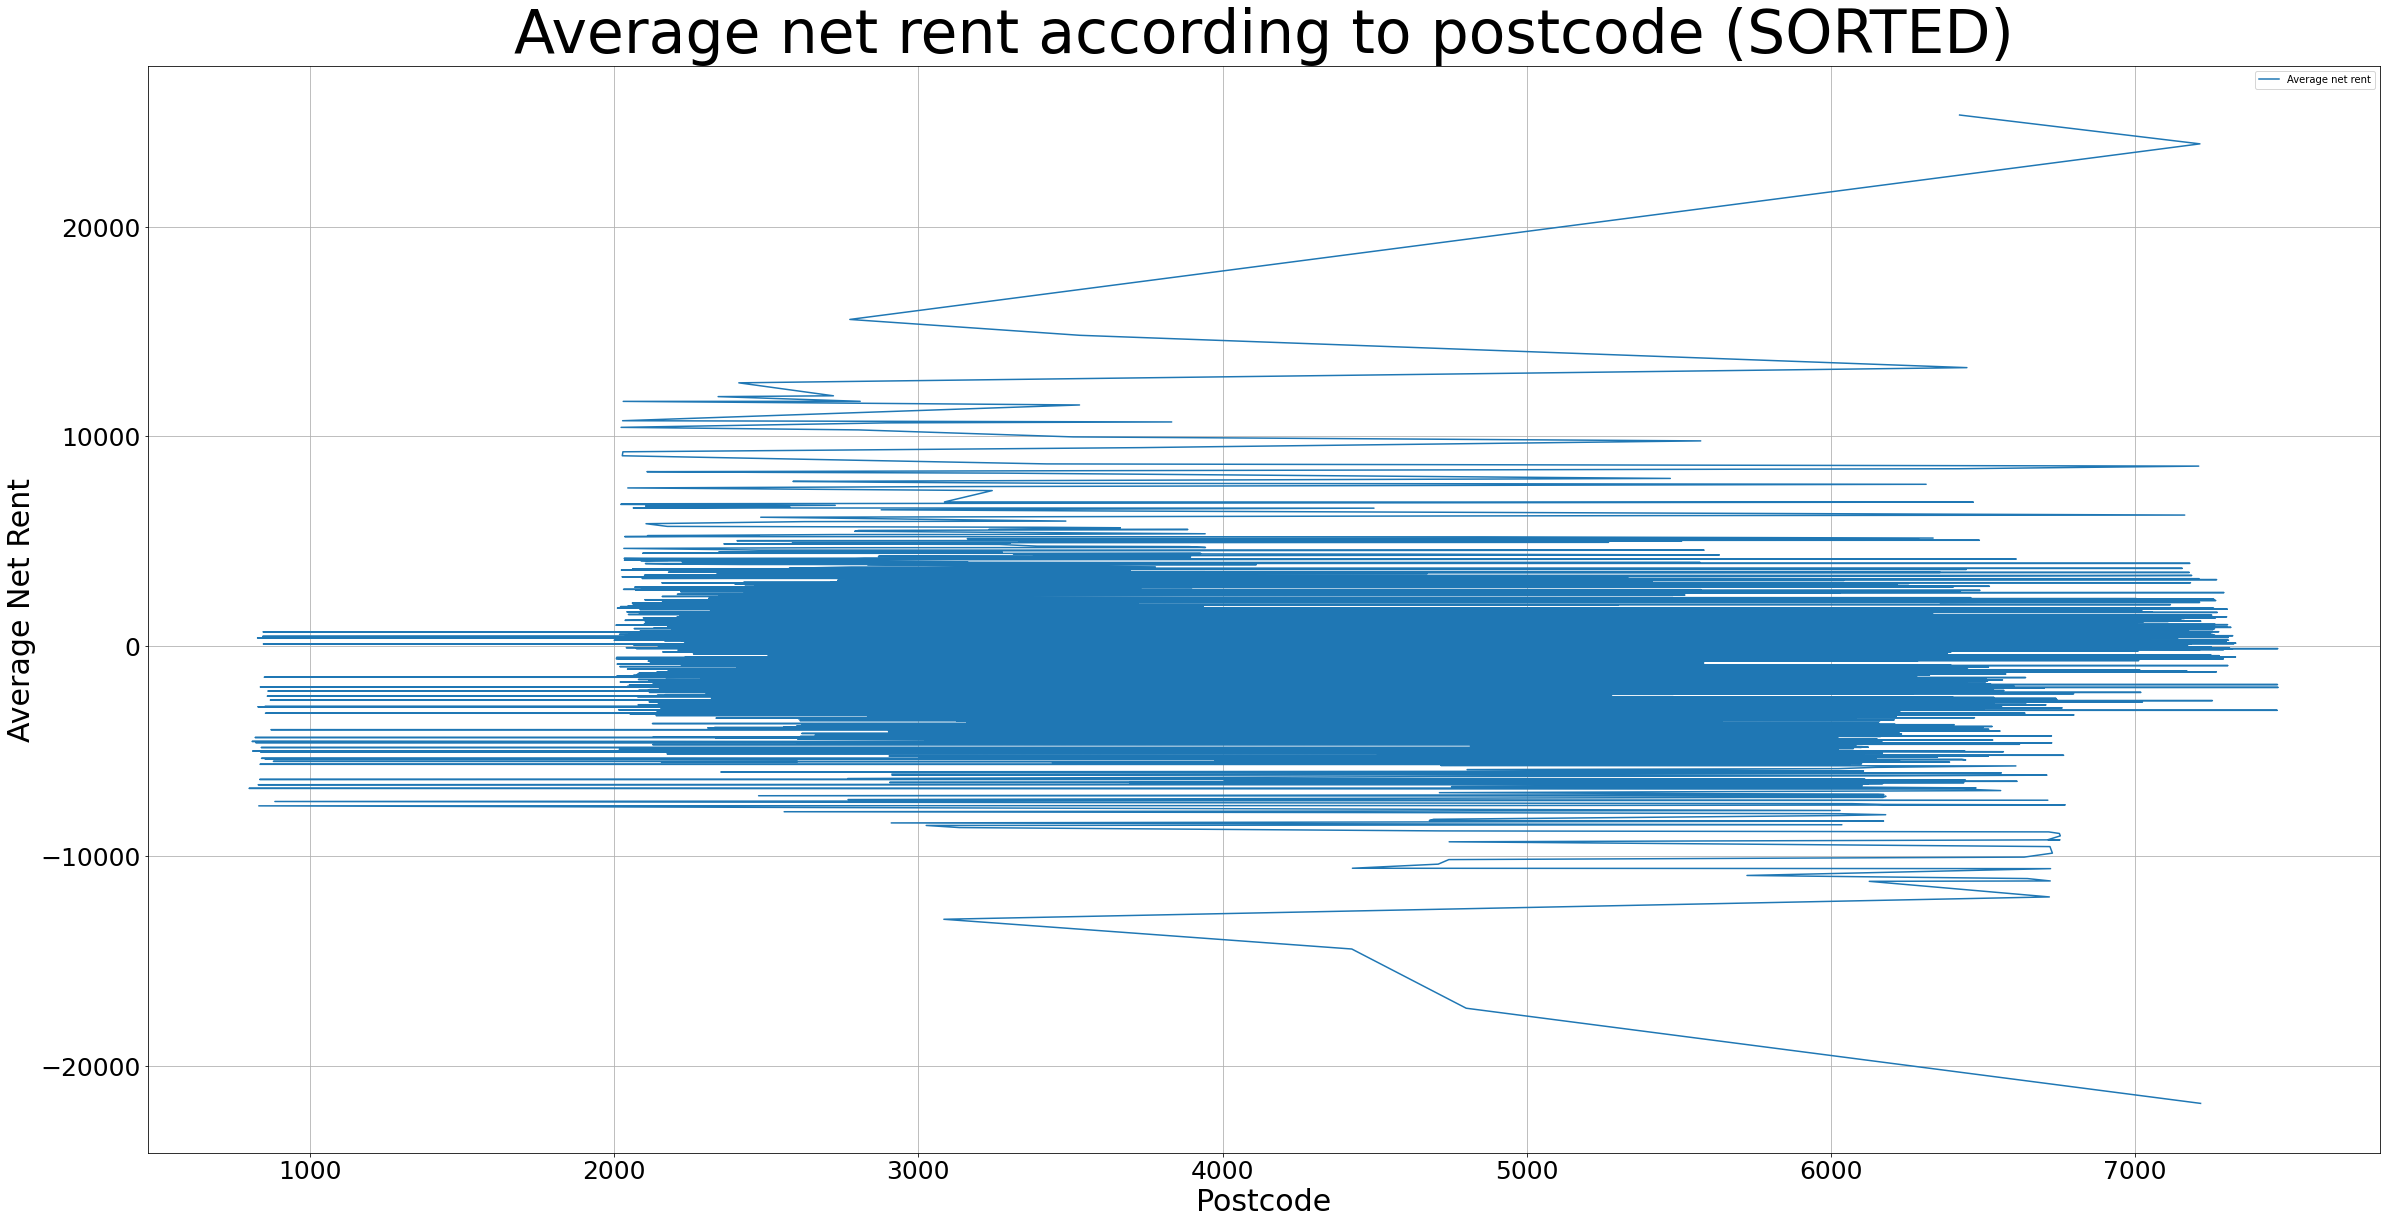

In [24]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_net_rent.sort_values(by=['Average net rent']).plot(x='Postcode', y='Average net rent', figsize=(40,20), grid=True)
plt.title('Average net rent according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Net Rent")

## Average total income or loss

In [25]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average total income or loss', figsize=(40,20), grid=True)
plt.title('Average total income or loss according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Income or Loss")

Text(0, 0.5, 'Average Total Income or Loss')

In [26]:
average_total_income_or_loss = data[['Postcode','Average total income or loss']]
average_total_income_or_loss.sort_values(by=['Average total income or loss']).head(10)

Postcode  Average total income or loss
266       2308                         20911
72        2052                         25940
1248      3889                         26733
1597      4611                         28646
1009      3482                         29676
862       3237                         31651
1246      3887                         32080
1487      4375                         32308
1651      4731                         32731
1501      4402                         32786

In [27]:
average_total_income_or_loss.sort_values(by=['Average total income or loss']).tail(10)

Postcode  Average total income or loss
100       2088                        168652
49        2028                        168922
76        2063                        176396
1289      3944                        177517
44        2023                        179533
51        2030                        187701
2056      6011                        196523
48        2027                        207213
777       3142                        209183
118       2108                        239276

In [28]:
average_total_income_or_loss.sort_values(by=['Average total income or loss']).describe()

Postcode  Average total income or loss
count  2472.000000                   2472.000000
mean   4094.410599                  57724.970469
std    1496.667668                  17438.849259
min     800.000000                  20911.000000
25%    2839.750000                  47671.750000
50%    3869.500000                  53907.500000
75%    5165.250000                  62604.500000
max    7470.000000                 239276.000000

## Average total income or loss according to postcode sorted

Text(0, 0.5, 'Average Total Income or Loss')

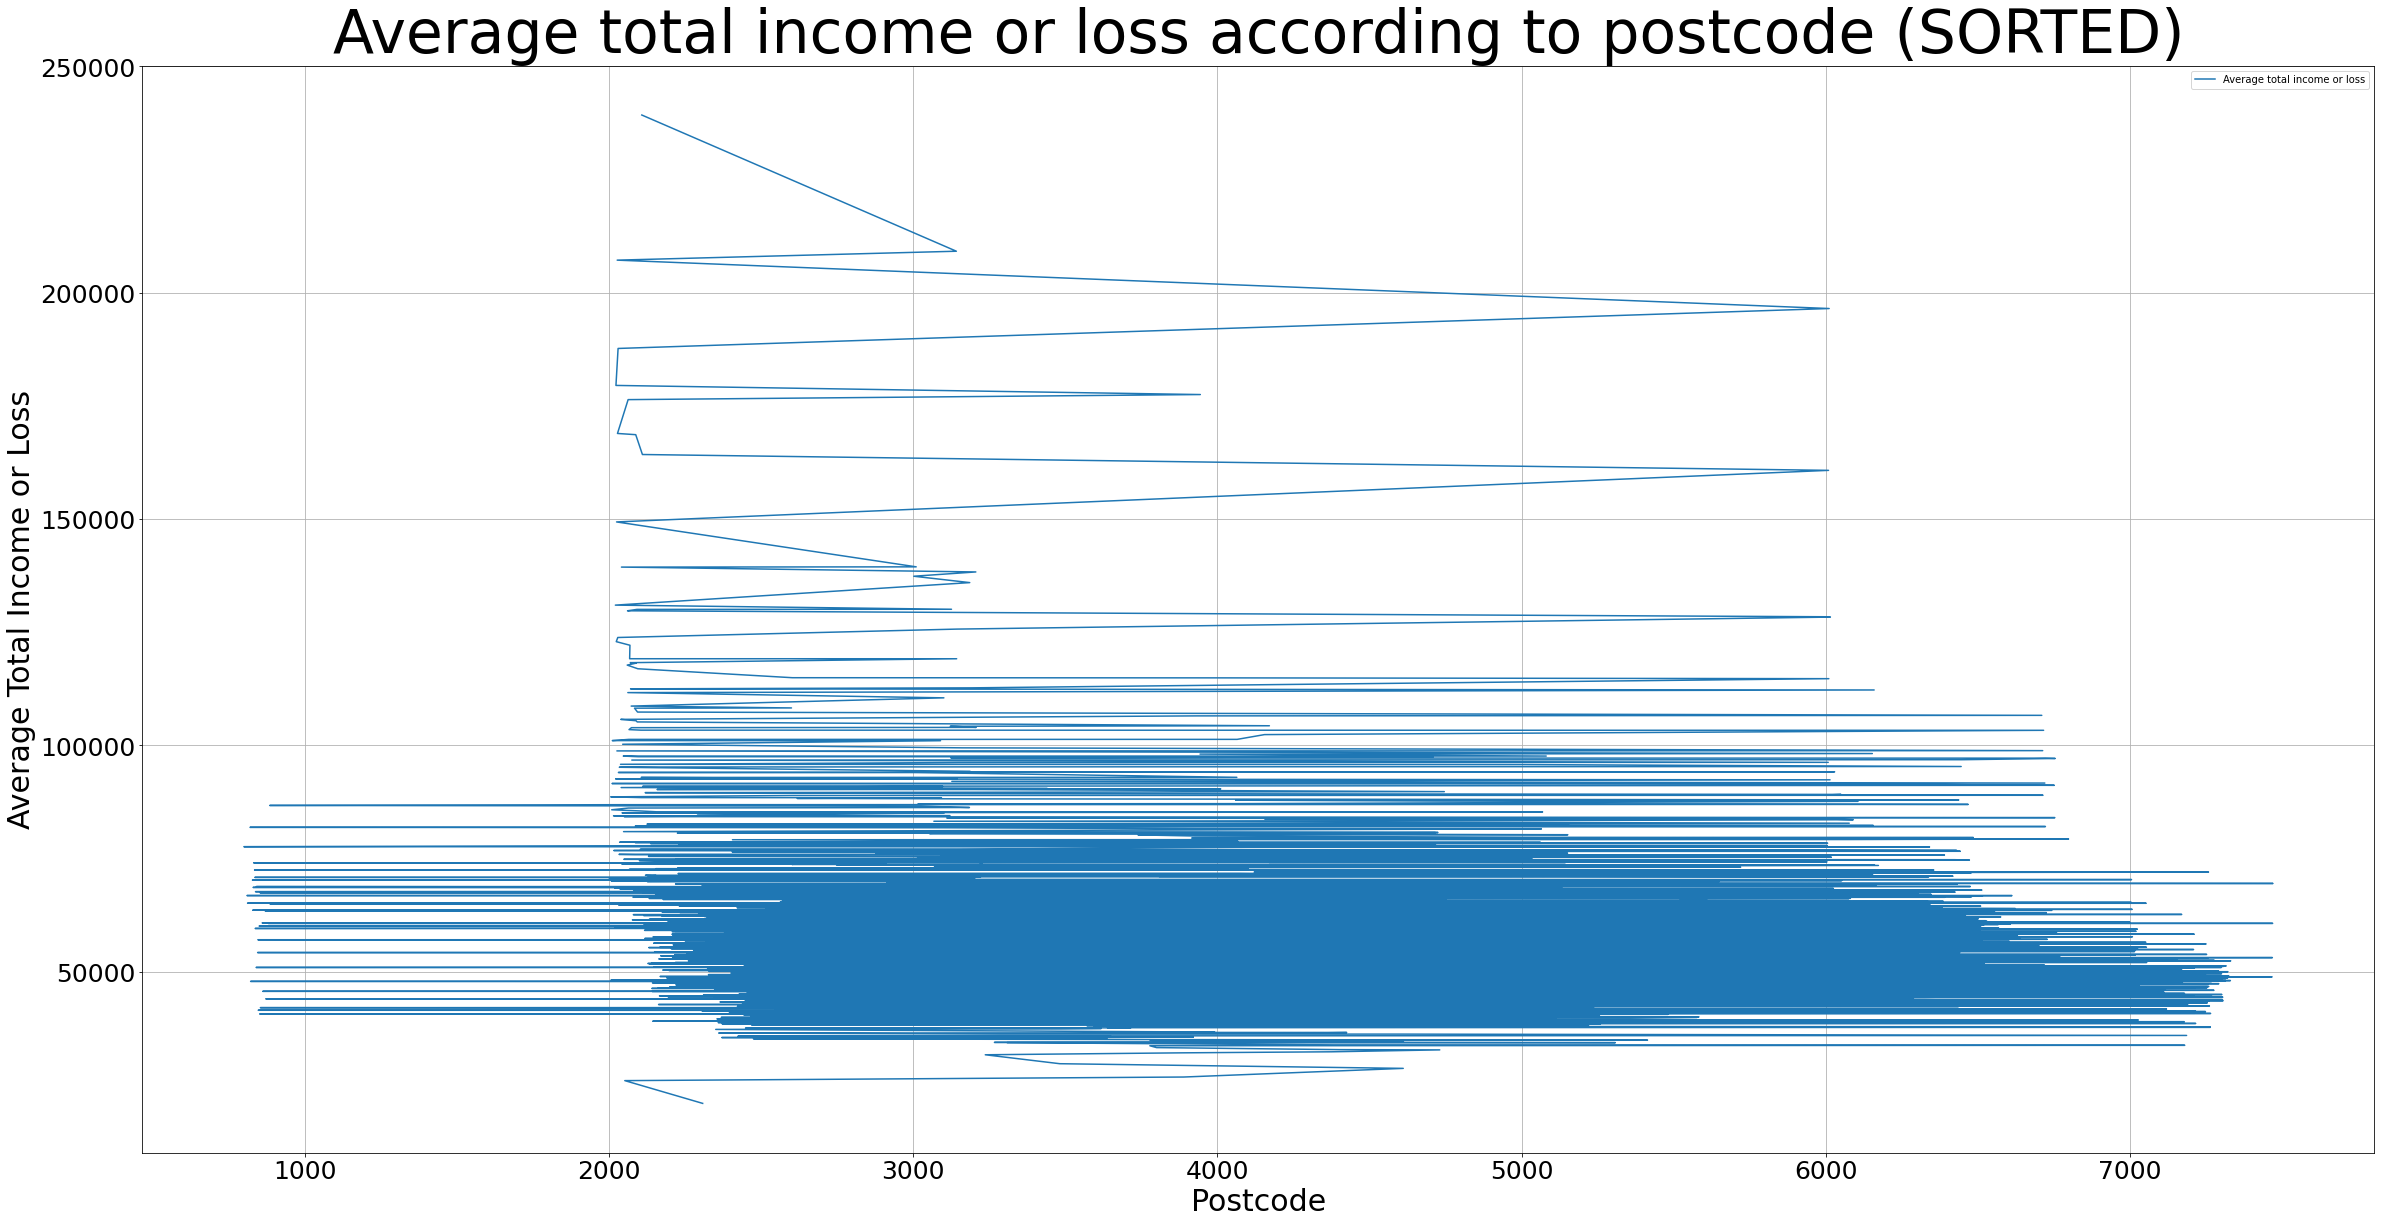

In [29]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_total_income_or_loss.sort_values(by=['Average total income or loss']).plot(x='Postcode', y='Average total income or loss', figsize=(40,20), grid=True)
plt.title('Average total income or loss according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Income or Loss")

## Average total deductions according to postcode

Text(0, 0.5, 'Average Total Deductions')

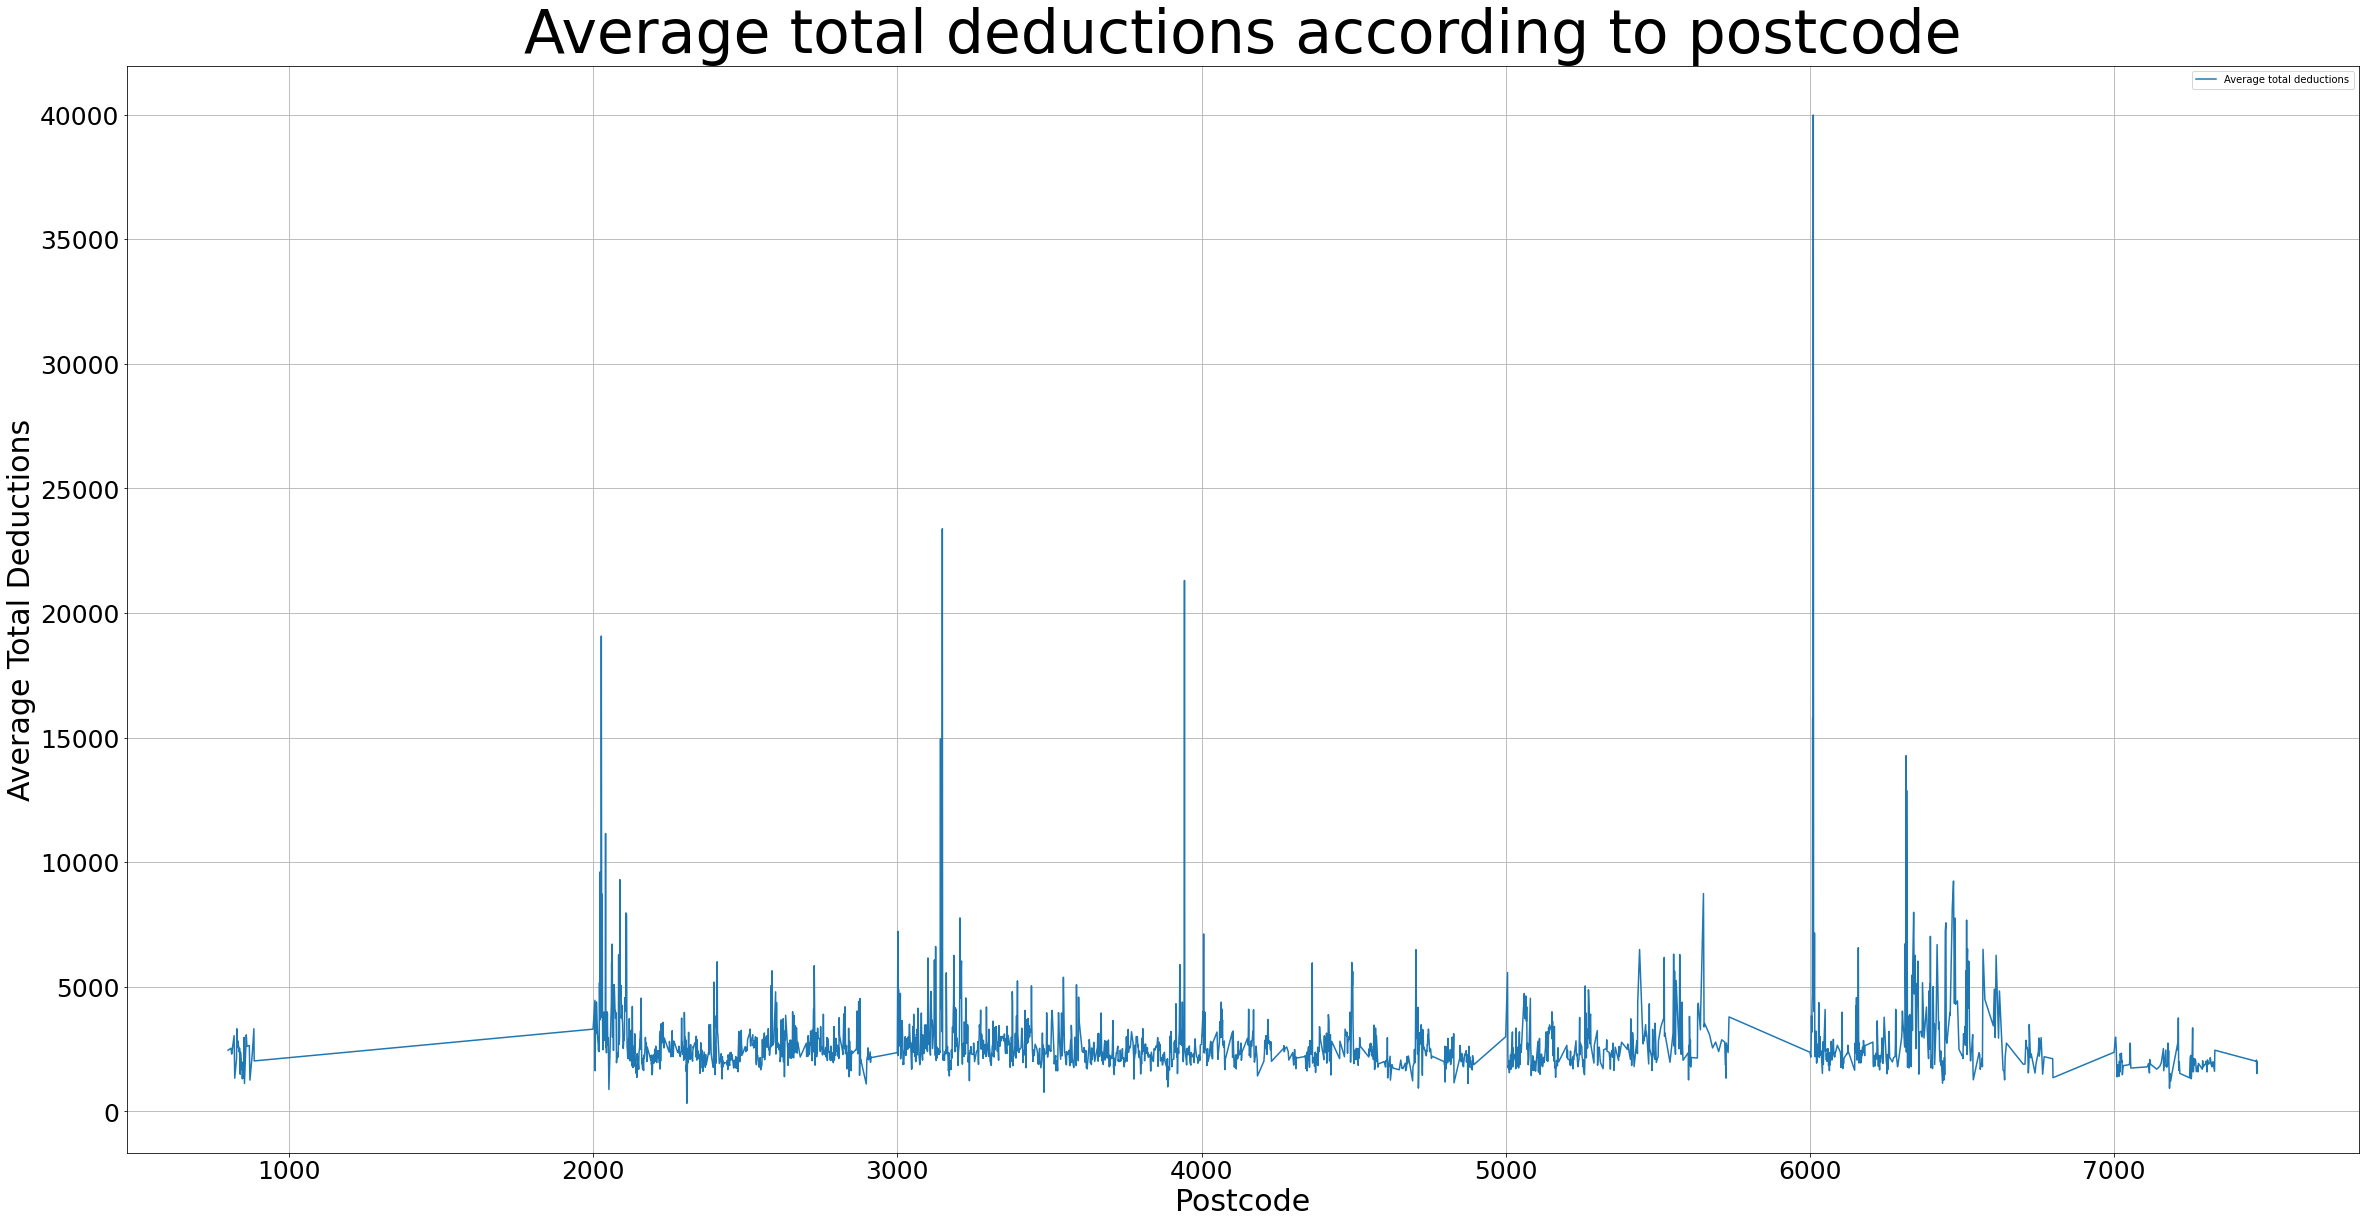

In [30]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average total deductions', figsize=(40,20), grid=True)
plt.title('Average total deductions according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Deductions")

### We can clearly see that there is an outlier in this graph at postcode 6436, at this postcode there is a substantial amount of tax deductions in comarison to any other postcode in australia, almost doubling the postcodes below.

In [31]:
average_total_deductions = data[['Postcode','Average total deductions']]
average_total_deductions.sort_values(by=['Average total deductions']).head(10)

Postcode  Average total deductions
266       2308                       322
1009      3482                       769
72        2052                       879
2414      7182                       929
1634      4713                       935
1248      3889                       983
645       2898                      1100
21         854                      1120
1718      4876                      1121
2276      6436                      1127

In [32]:
average_total_deductions.sort_values(by=['Average total deductions']).tail(10)

Postcode  Average total deductions
44        2023                      9612
62        2041                     11150
2220      6318                     12878
2218      6316                     14275
777       3142                     14949
2054      6009                     15786
48        2027                     19075
1289      3944                     21307
783       3148                     23383
2056      6011                     39986

In [33]:
average_total_deductions.sort_values(by=['Average total deductions']).describe()

Postcode  Average total deductions
count  2472.000000               2472.000000
mean   4094.410599               2687.444984
std    1496.667668               1472.149365
min     800.000000                322.000000
25%    2839.750000               2071.750000
50%    3869.500000               2398.500000
75%    5165.250000               2866.250000
max    7470.000000              39986.000000

## Average total deductions according to postcode sorted

Text(0, 0.5, 'Average Total Deductions')

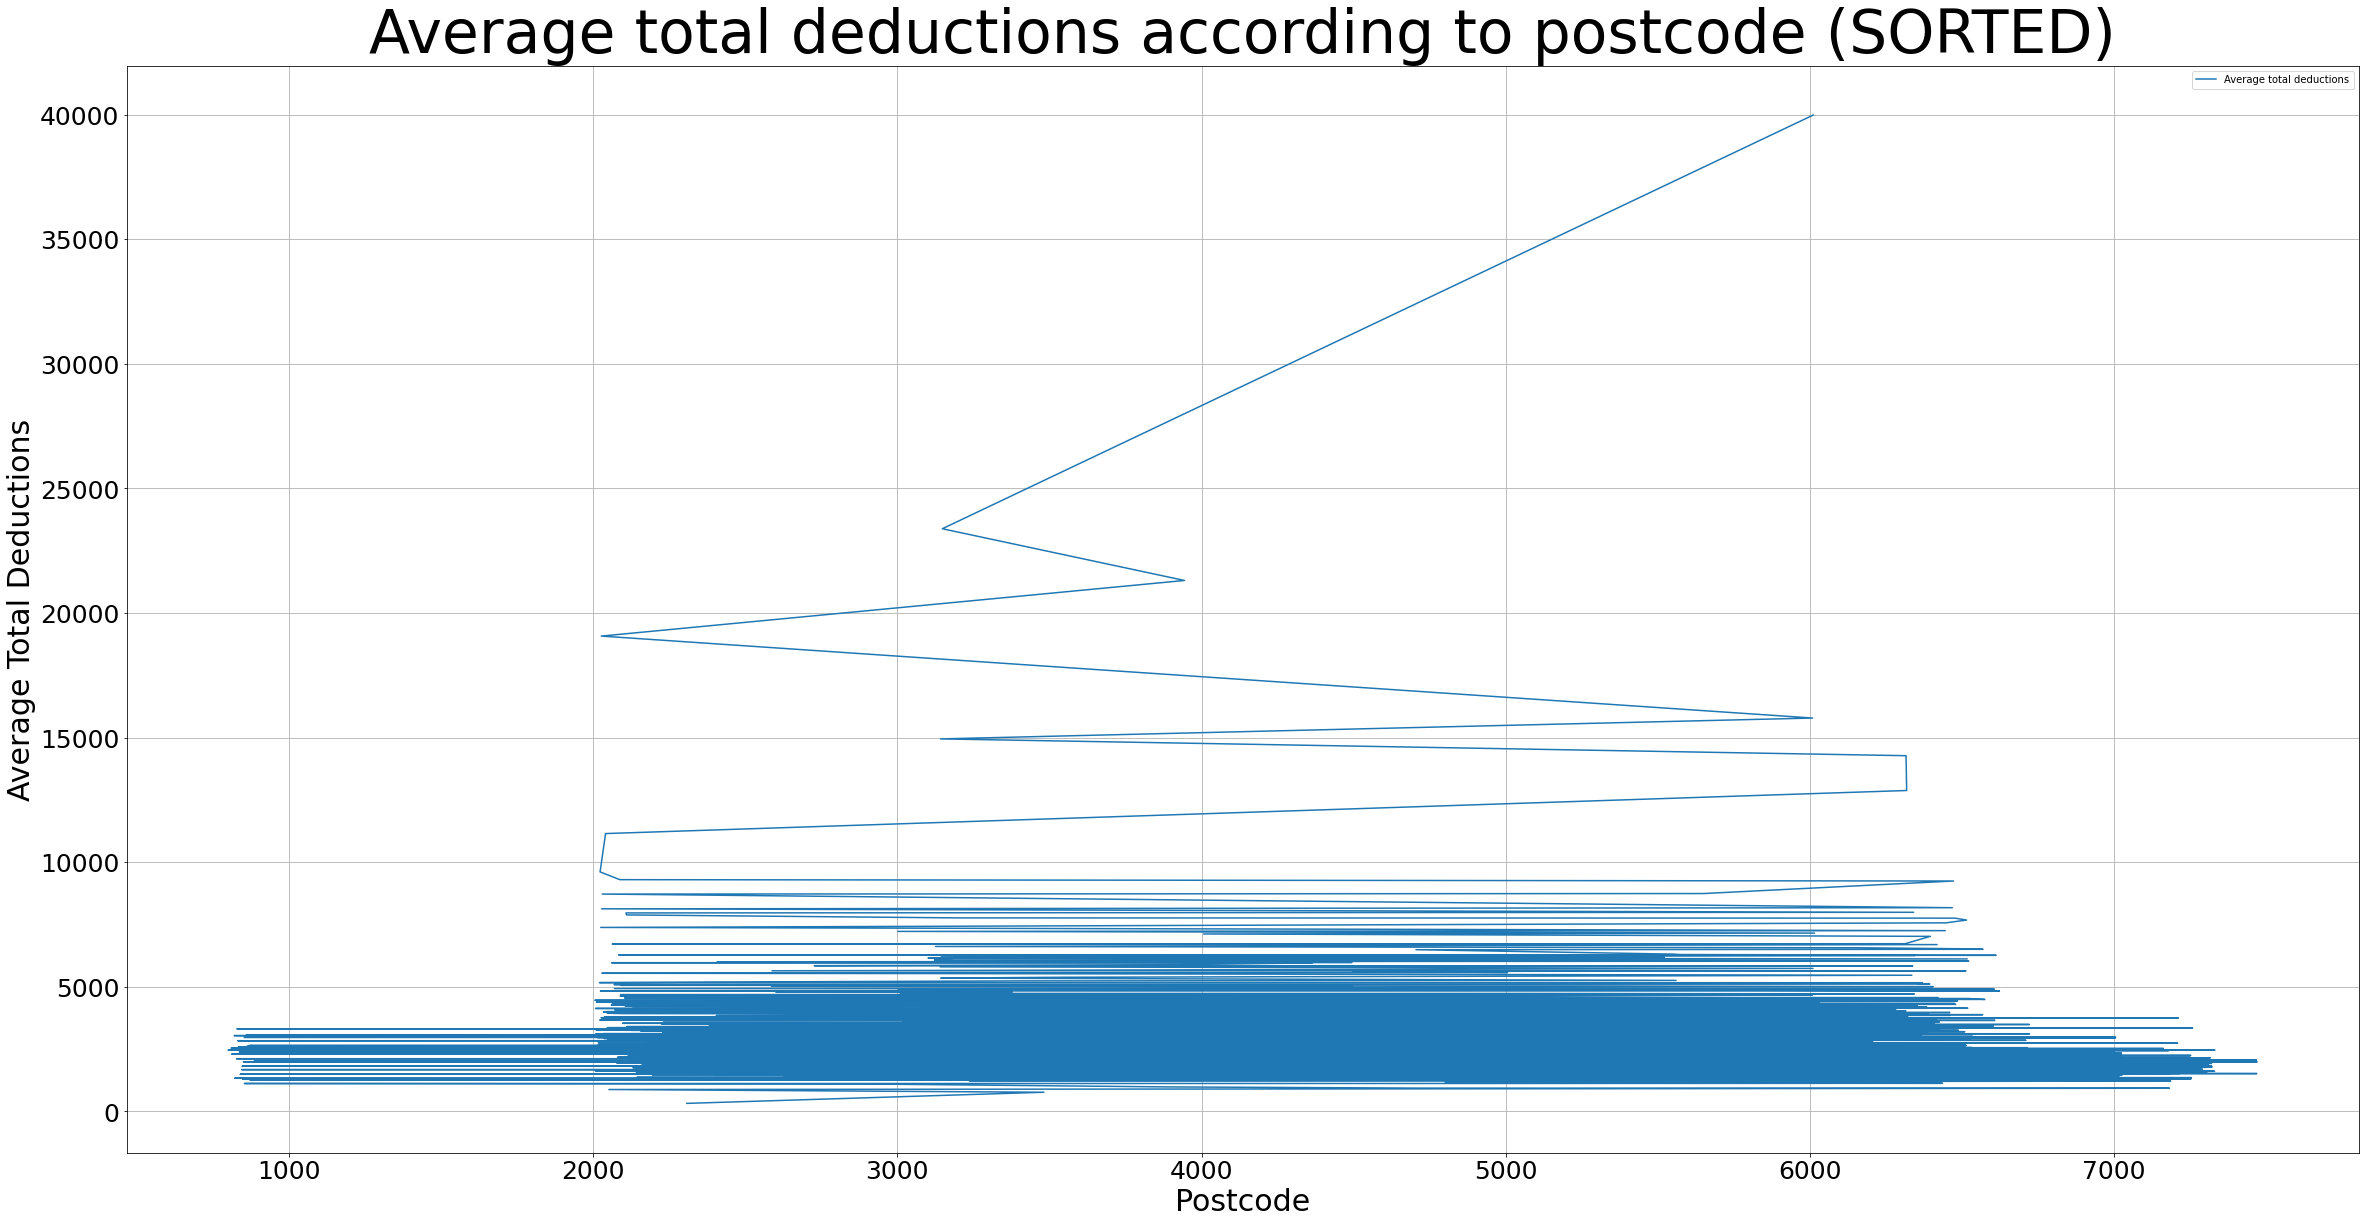

In [34]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_total_deductions.sort_values(by=['Average total deductions']).plot(x='Postcode', y='Average total deductions', figsize=(40,20), grid=True)
plt.title('Average total deductions according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Deductions")

## Average total business income according to postcode

Text(0, 0.5, 'Average Total Business Income')

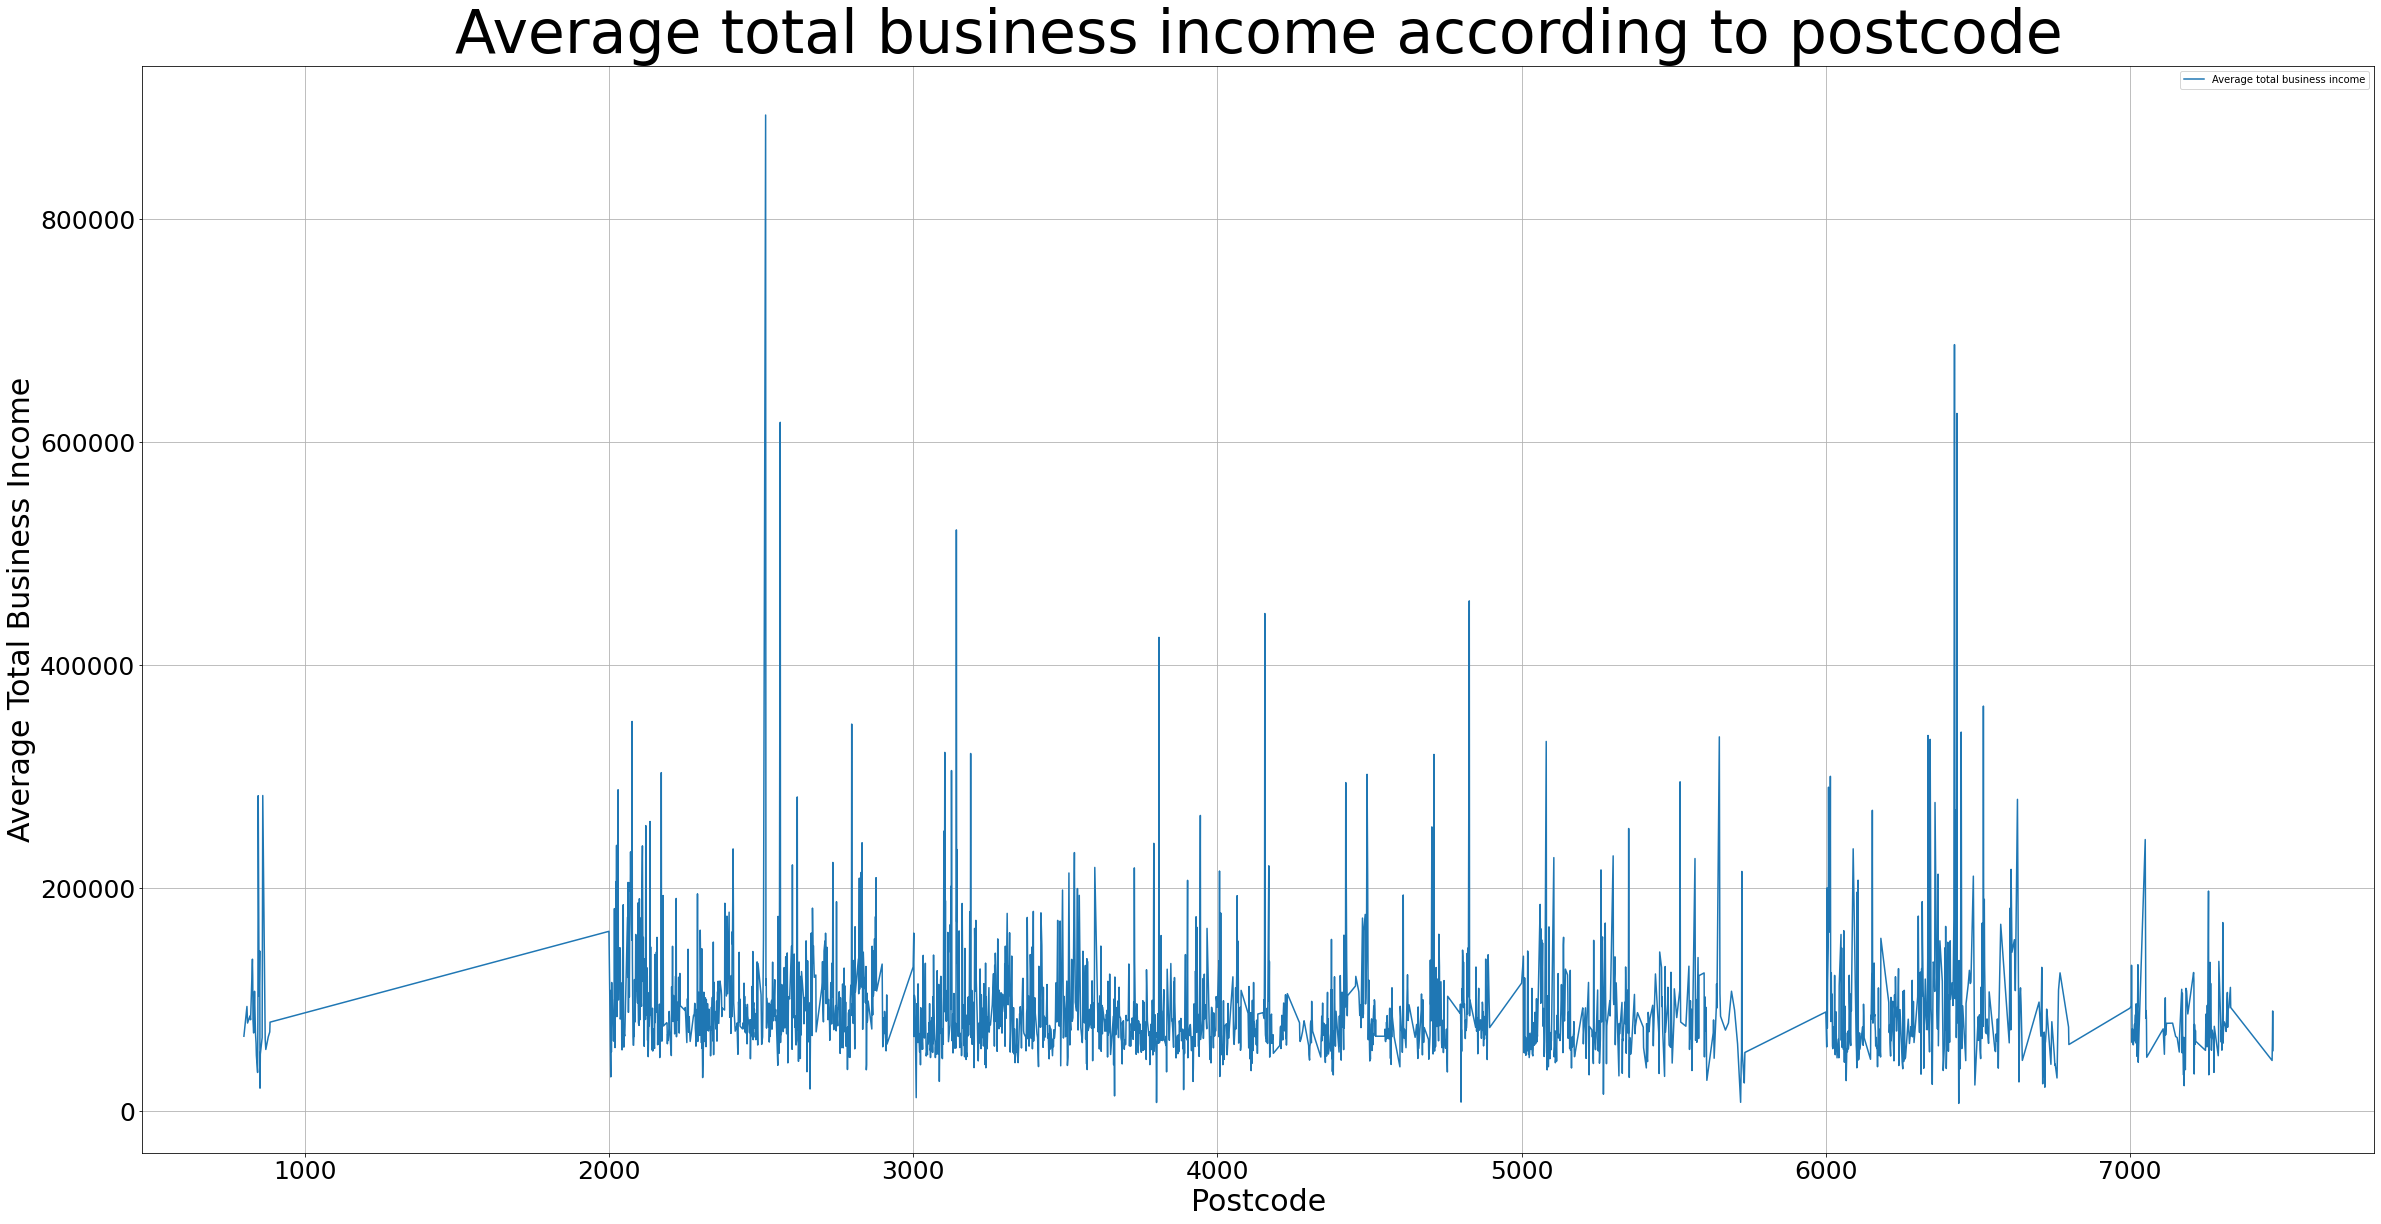

In [35]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average total business income', figsize=(40,20), grid=True)
plt.title('Average total business income according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Business Income")

In [36]:
average_total_business_income = data[['Postcode','Average total business income']]
average_total_business_income.sort_values(by=['Average total business income']).head(10)

Postcode  Average total business income
2277      6437                           6564
1194      3800                           7348
2039      5720                           7511
1672      4801                           7713
662       3010                          11712
1104      3662                          13266
1907      5269                          14820
1248      3889                          18875
506       2661                          19454
20         853                          20216

In [37]:
average_total_business_income.sort_values(by=['Average total business income']).tail(10)

Postcode  Average total business income
89        2076                         349113
2309      6518                         362898
1201      3808                         424524
1400      4156                         445919
1696      4828                         457244
777       3142                         520899
431       2563                         617401
2274      6431                         625379
2269      6423                         687116
399       2515                         893035

In [38]:
average_total_business_income.sort_values(by=['Average total business income']).describe()

Postcode  Average total business income
count  2472.000000                    2472.000000
mean   4094.410599                   91673.022249
std    1496.667668                   52207.273983
min     800.000000                    6564.000000
25%    2839.750000                   63631.500000
50%    3869.500000                   80157.500000
75%    5165.250000                  103067.250000
max    7470.000000                  893035.000000

## Average total business income according to postcode sorted

Text(0, 0.5, 'Average Total Business Income')

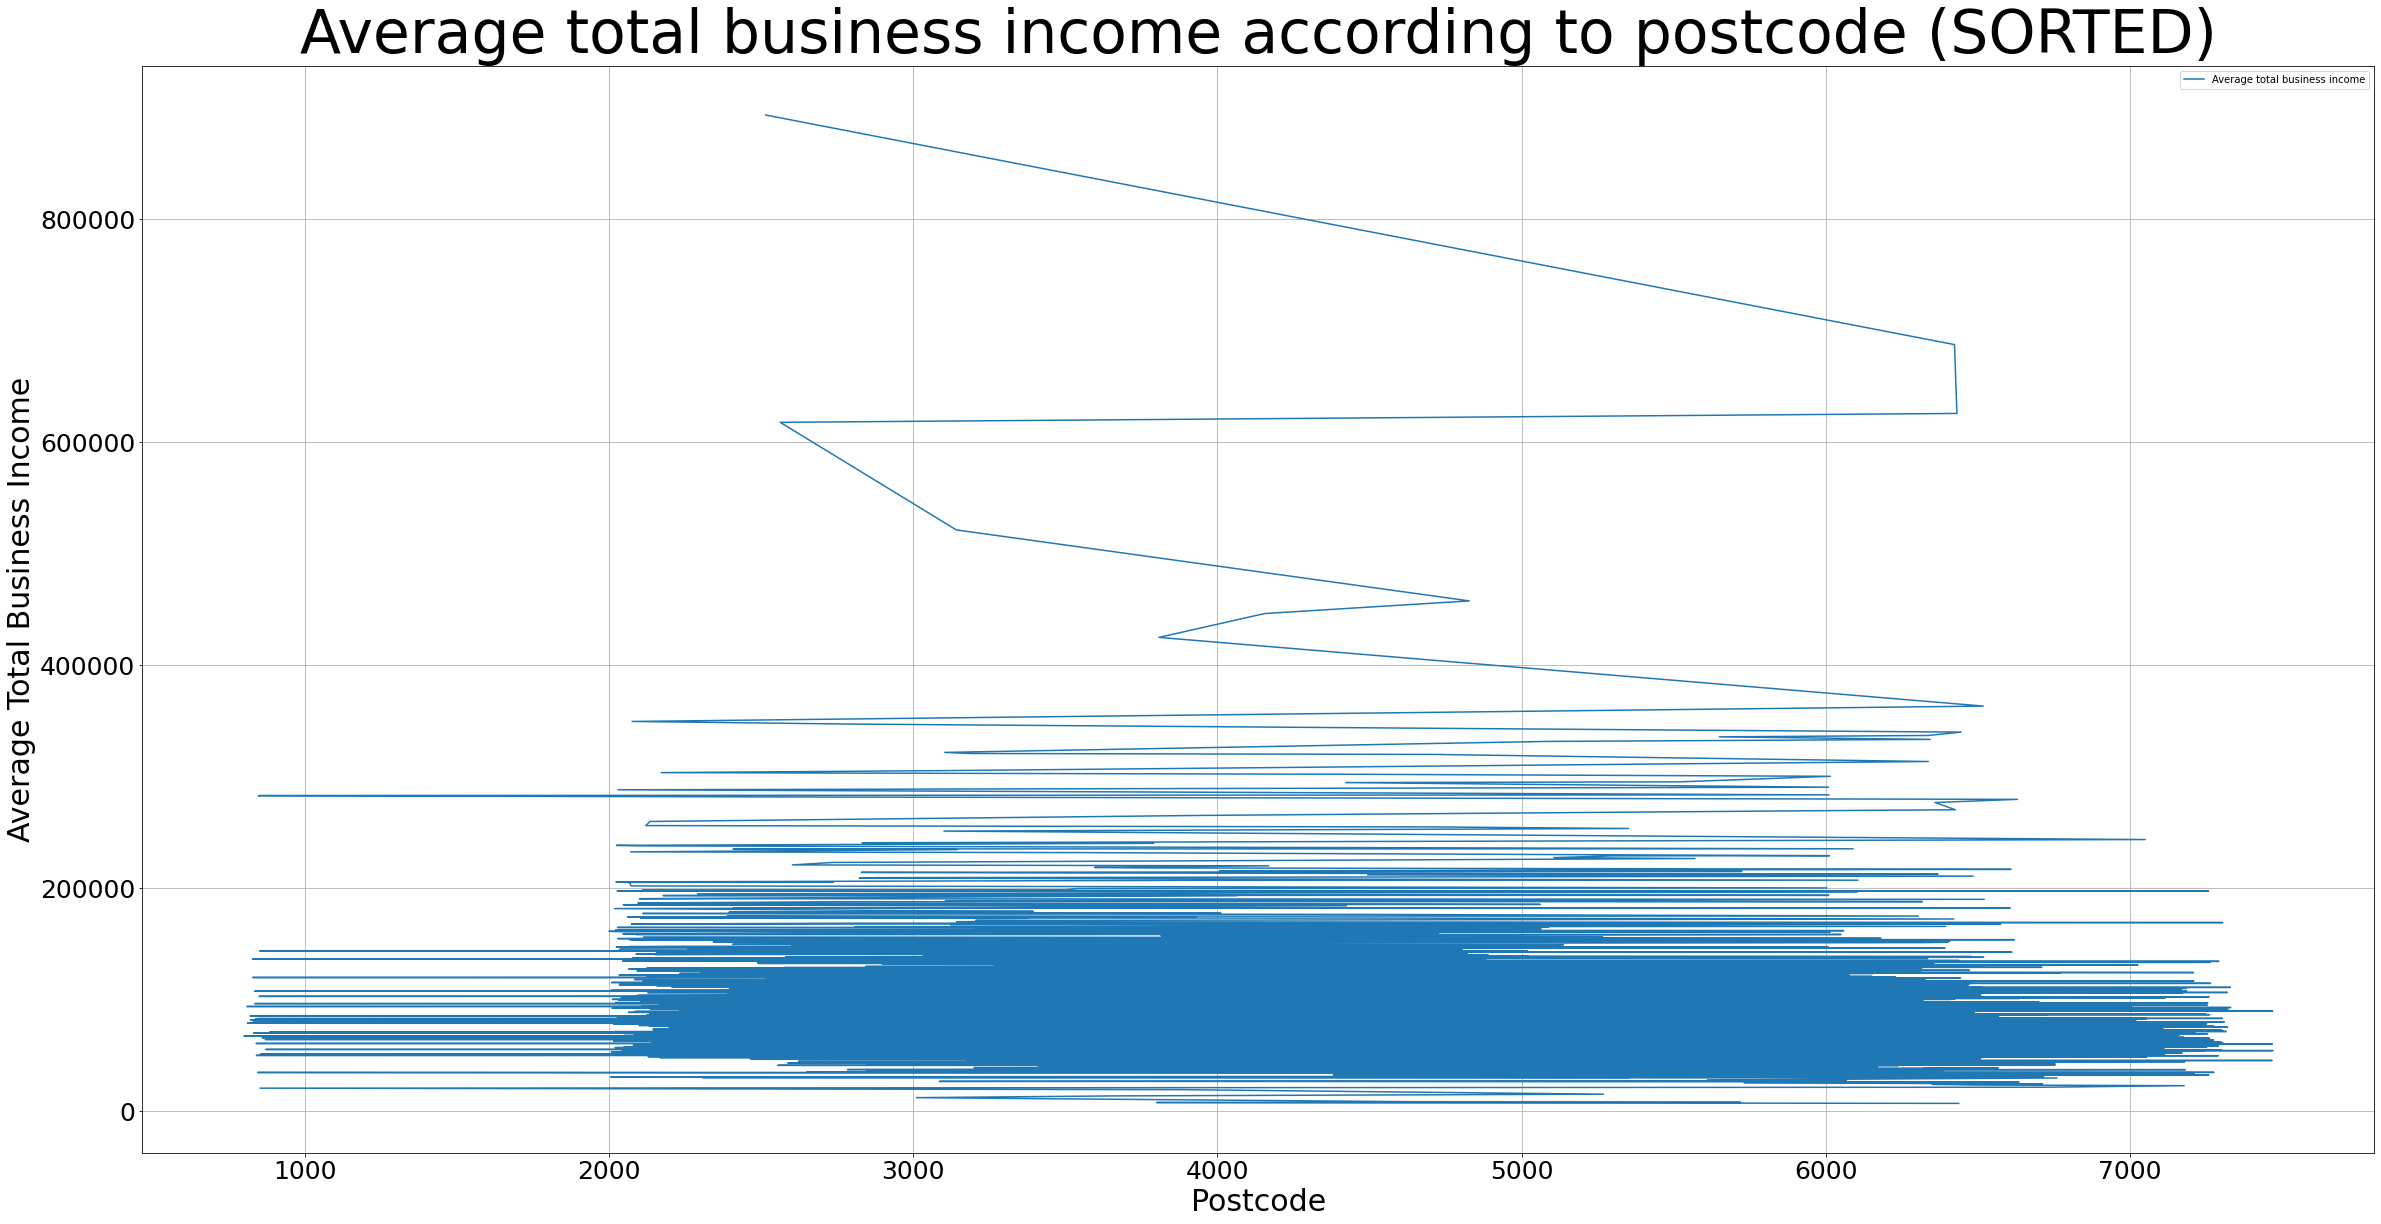

In [39]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_total_business_income.sort_values(by=['Average total business income']).plot(x='Postcode', y='Average total business income', figsize=(40,20), grid=True)
plt.title('Average total business income according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Business Income")

## Average total business expenses according to postcode

Text(0, 0.5, 'Average Total Business Expenses')

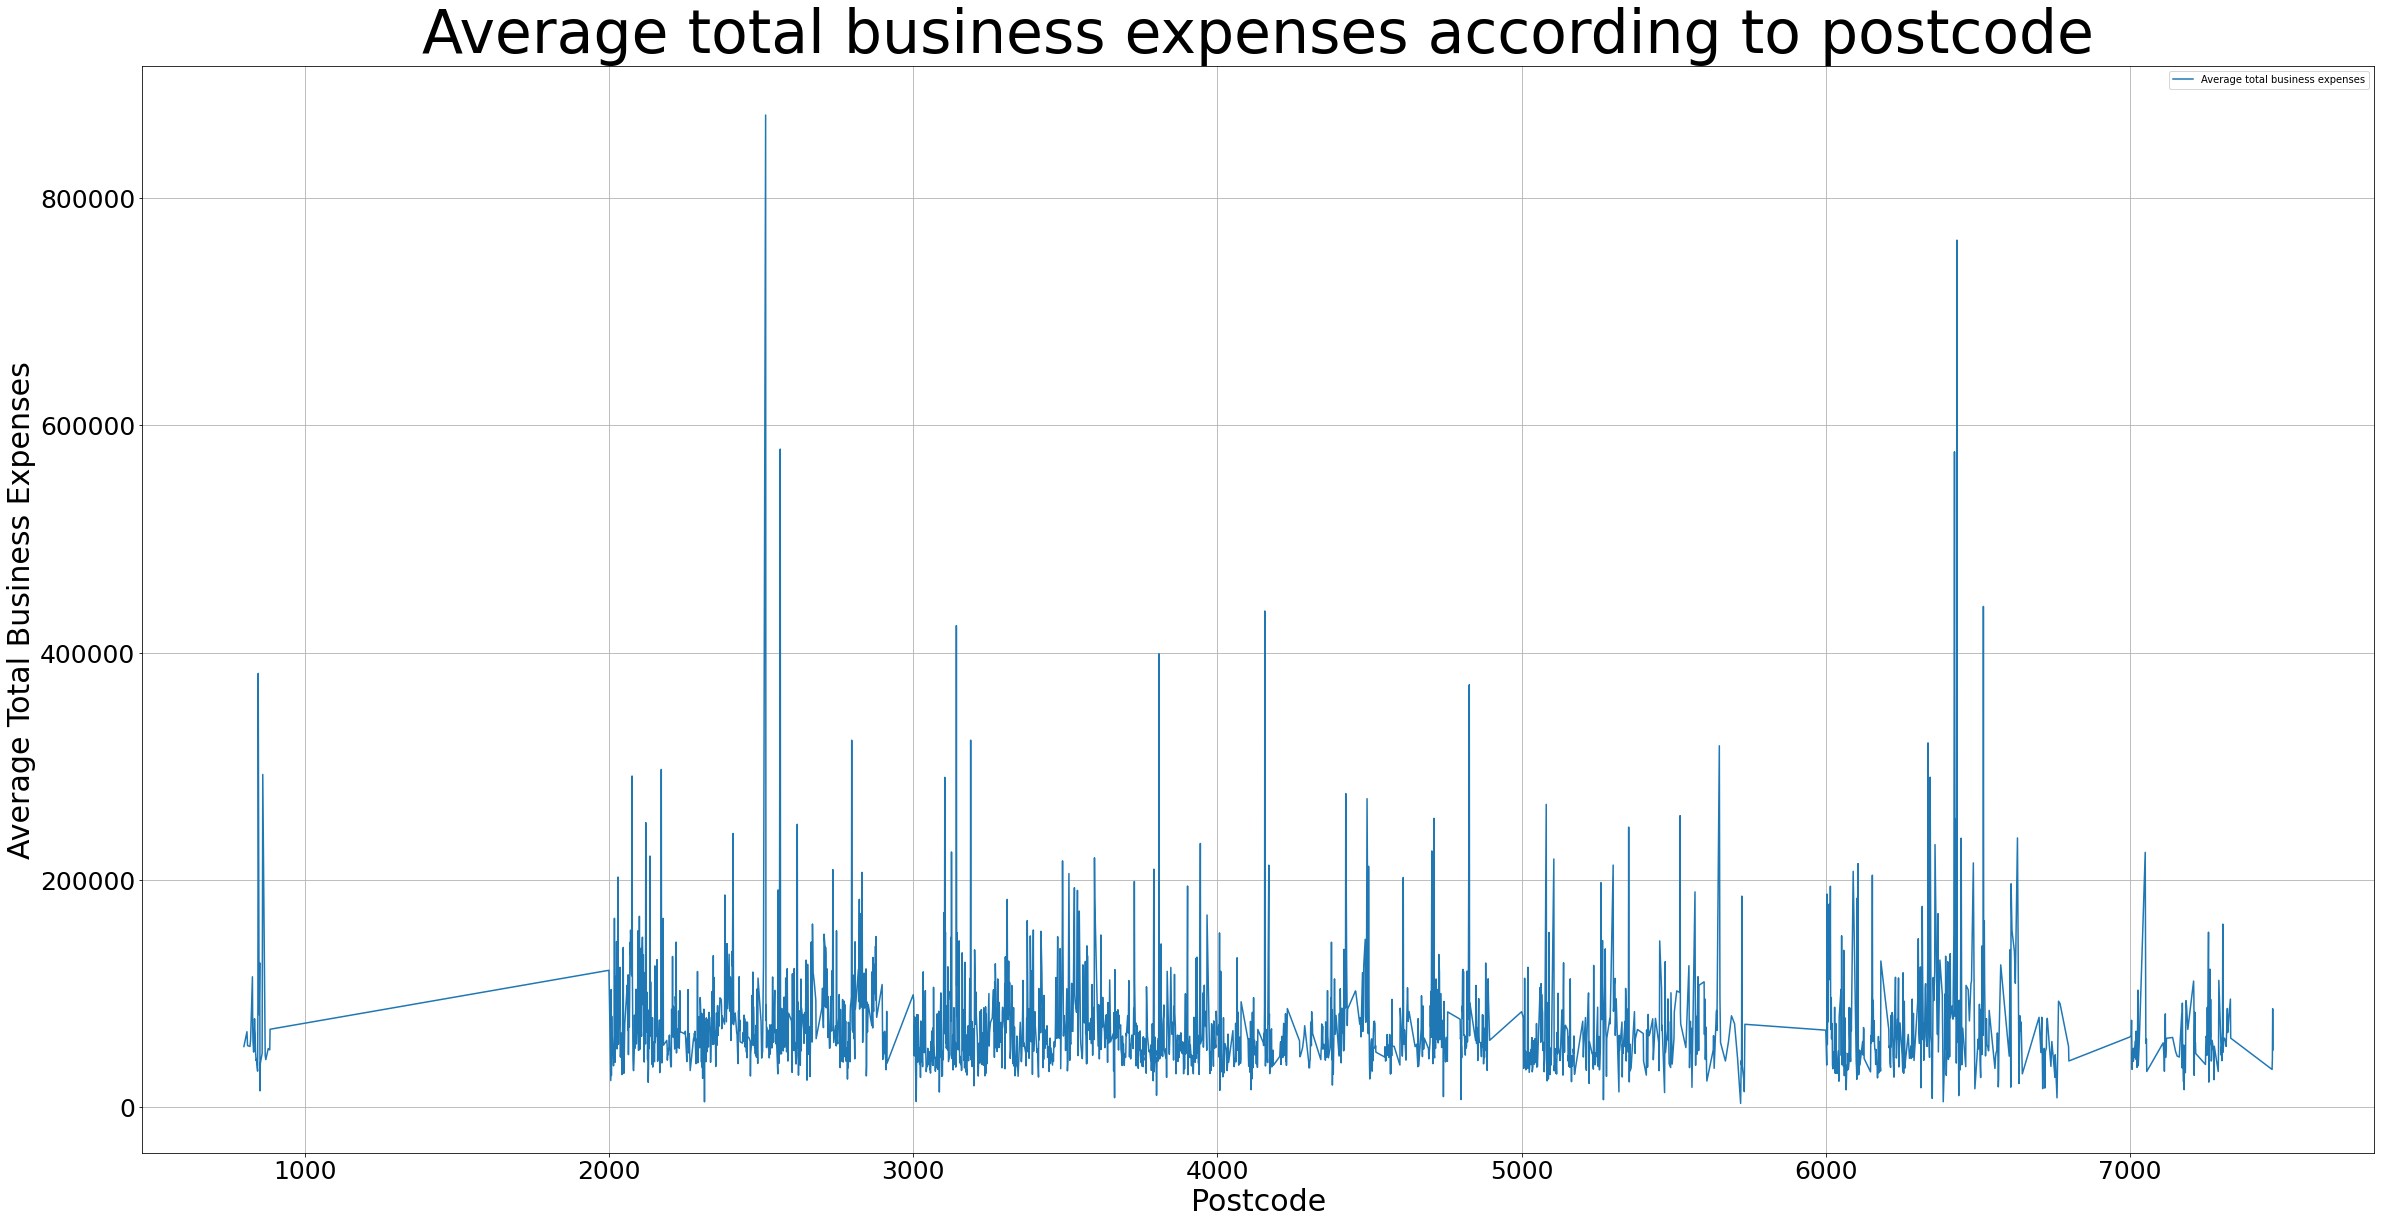

In [40]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average total business expenses', figsize=(40,20), grid=True)
plt.title('Average total business expenses according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Business Expenses")

In [41]:
average_total_business_expenses = data[['Postcode','Average total business expenses']]
average_total_business_expenses.sort_values(by=['Average total business expenses']).head(10)

Postcode  Average total business expenses
2039      5720                             3467
269       2314                             4825
2251      6386                             4908
662       3010                             5121
1907      5269                             6670
1672      4801                             6839
2239      6350                             7812
2361      6760                             8344
1104      3662                             8428
1659      4743                             9394

In [42]:
average_total_business_expenses.sort_values(by=['Average total business expenses']).tail(10)

Postcode  Average total business expenses
1696      4828                           371642
17         847                           381639
1201      3808                           398883
777       3142                           423664
1400      4156                           436531
2309      6518                           440535
2269      6423                           576542
431       2563                           578901
2274      6431                           762708
399       2515                           872746

In [43]:
average_total_business_expenses.sort_values(by=['Average total business expenses']).describe()

Postcode  Average total business expenses
count  2472.000000                      2472.000000
mean   4094.410599                     71500.463188
std    1496.667668                     49228.521036
min     800.000000                      3467.000000
25%    2839.750000                     45632.000000
50%    3869.500000                     60708.000000
75%    5165.250000                     82337.250000
max    7470.000000                    872746.000000

## Average total business expenses according to postcode sorted

Text(0, 0.5, 'Average Total Business Expenses')

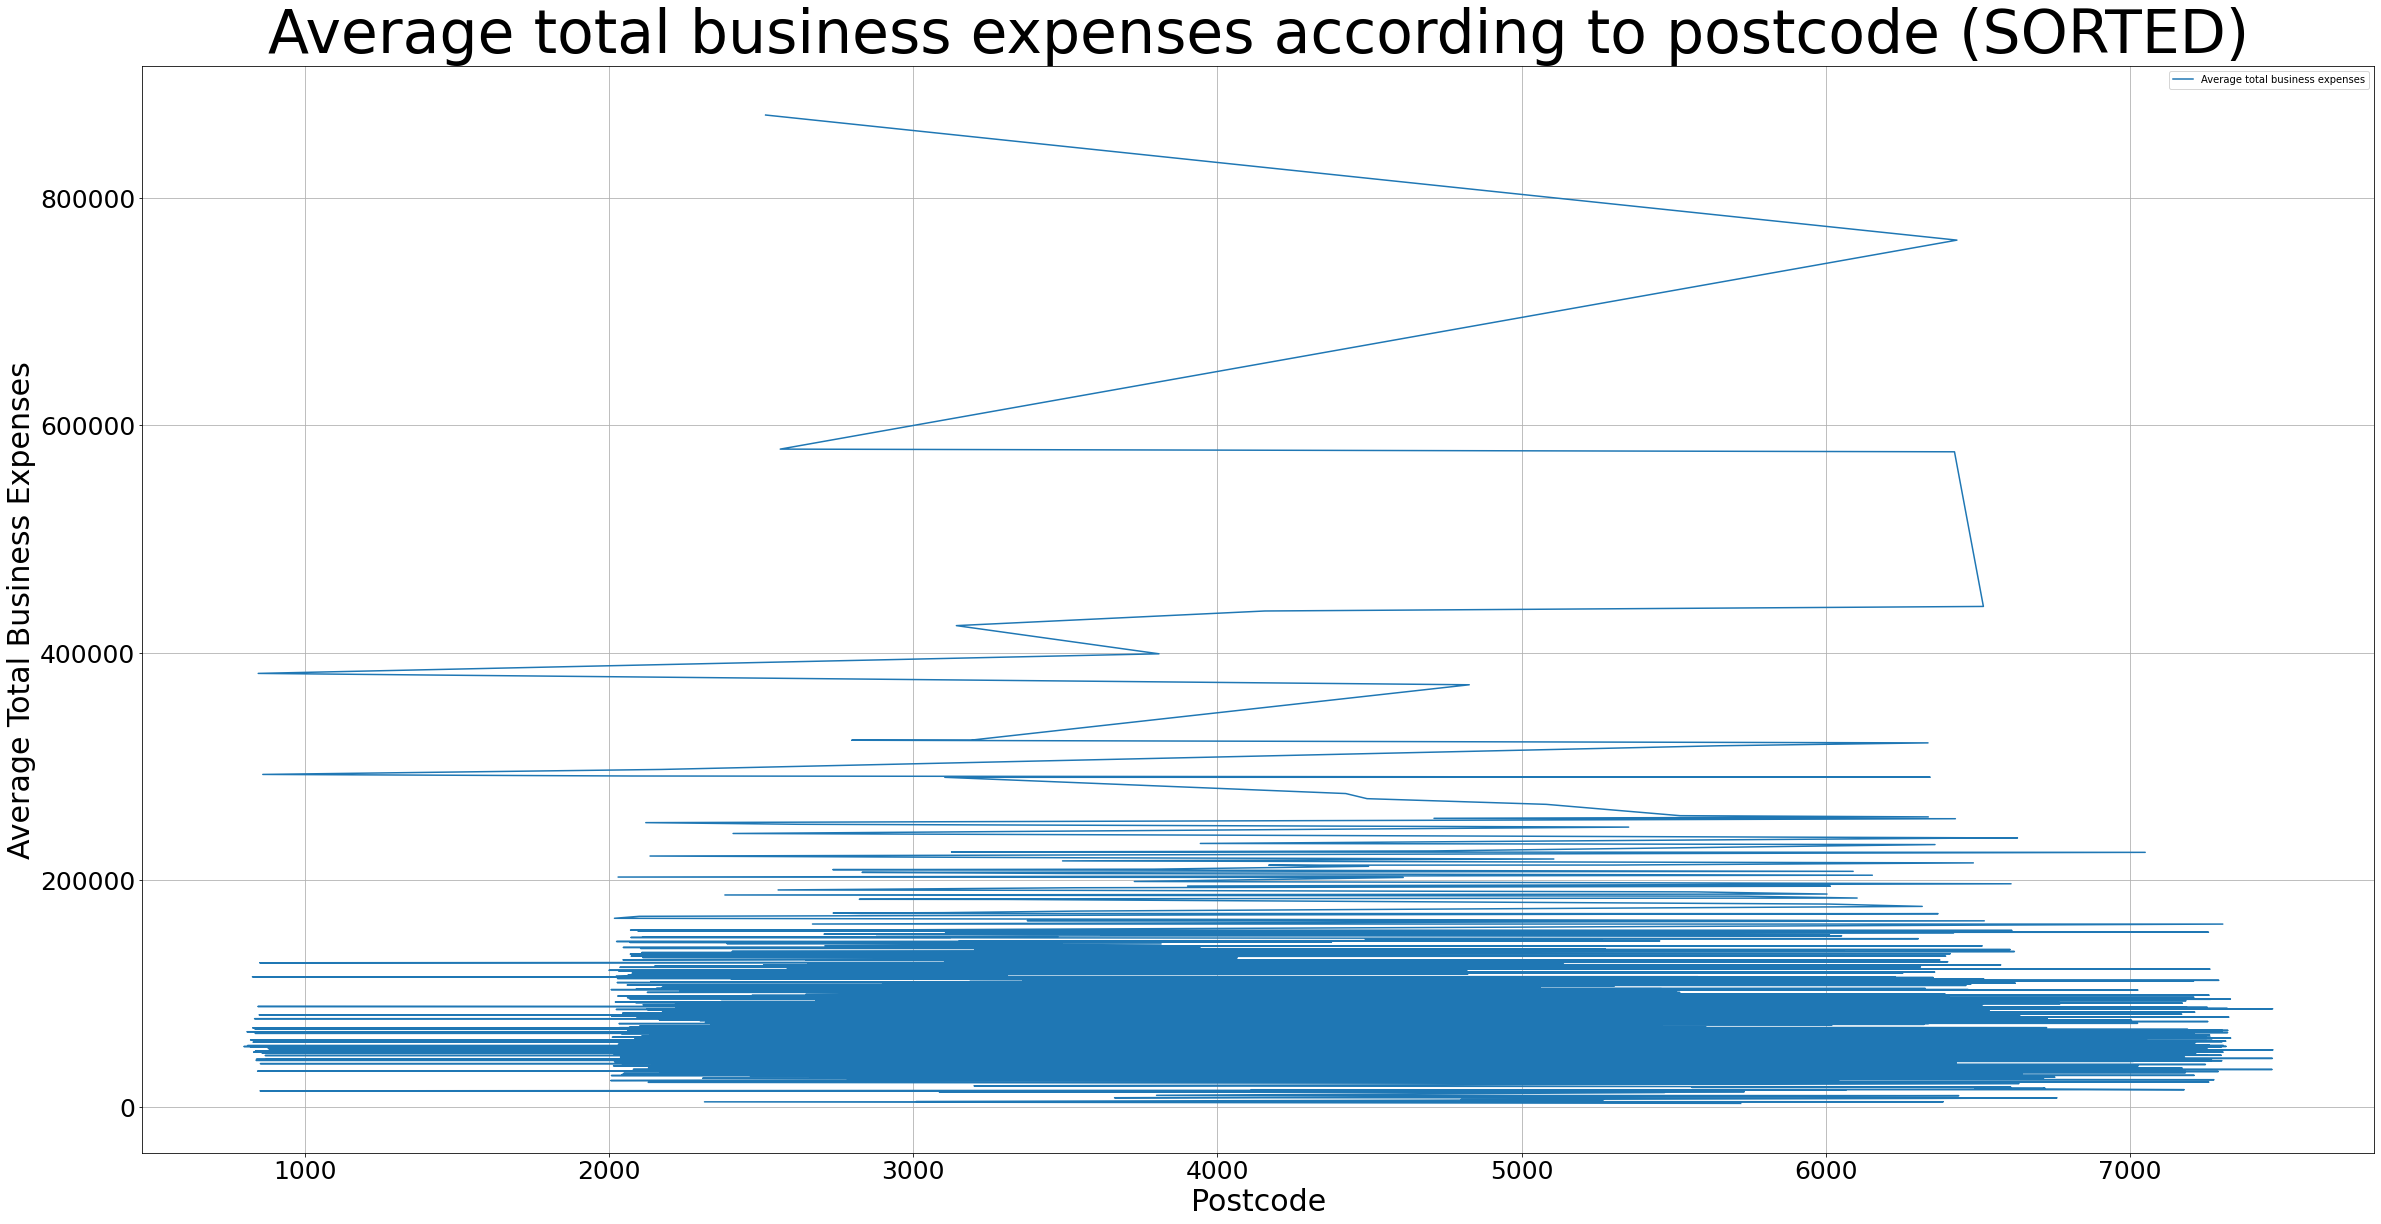

In [44]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_total_business_expenses.sort_values(by=['Average total business expenses']).plot(x='Postcode', y='Average total business expenses', figsize=(40,20), grid=True)
plt.title('Average total business expenses according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Business Expenses")

## Average net tax according to postcode

Text(0, 0.5, 'Average Net Tax')

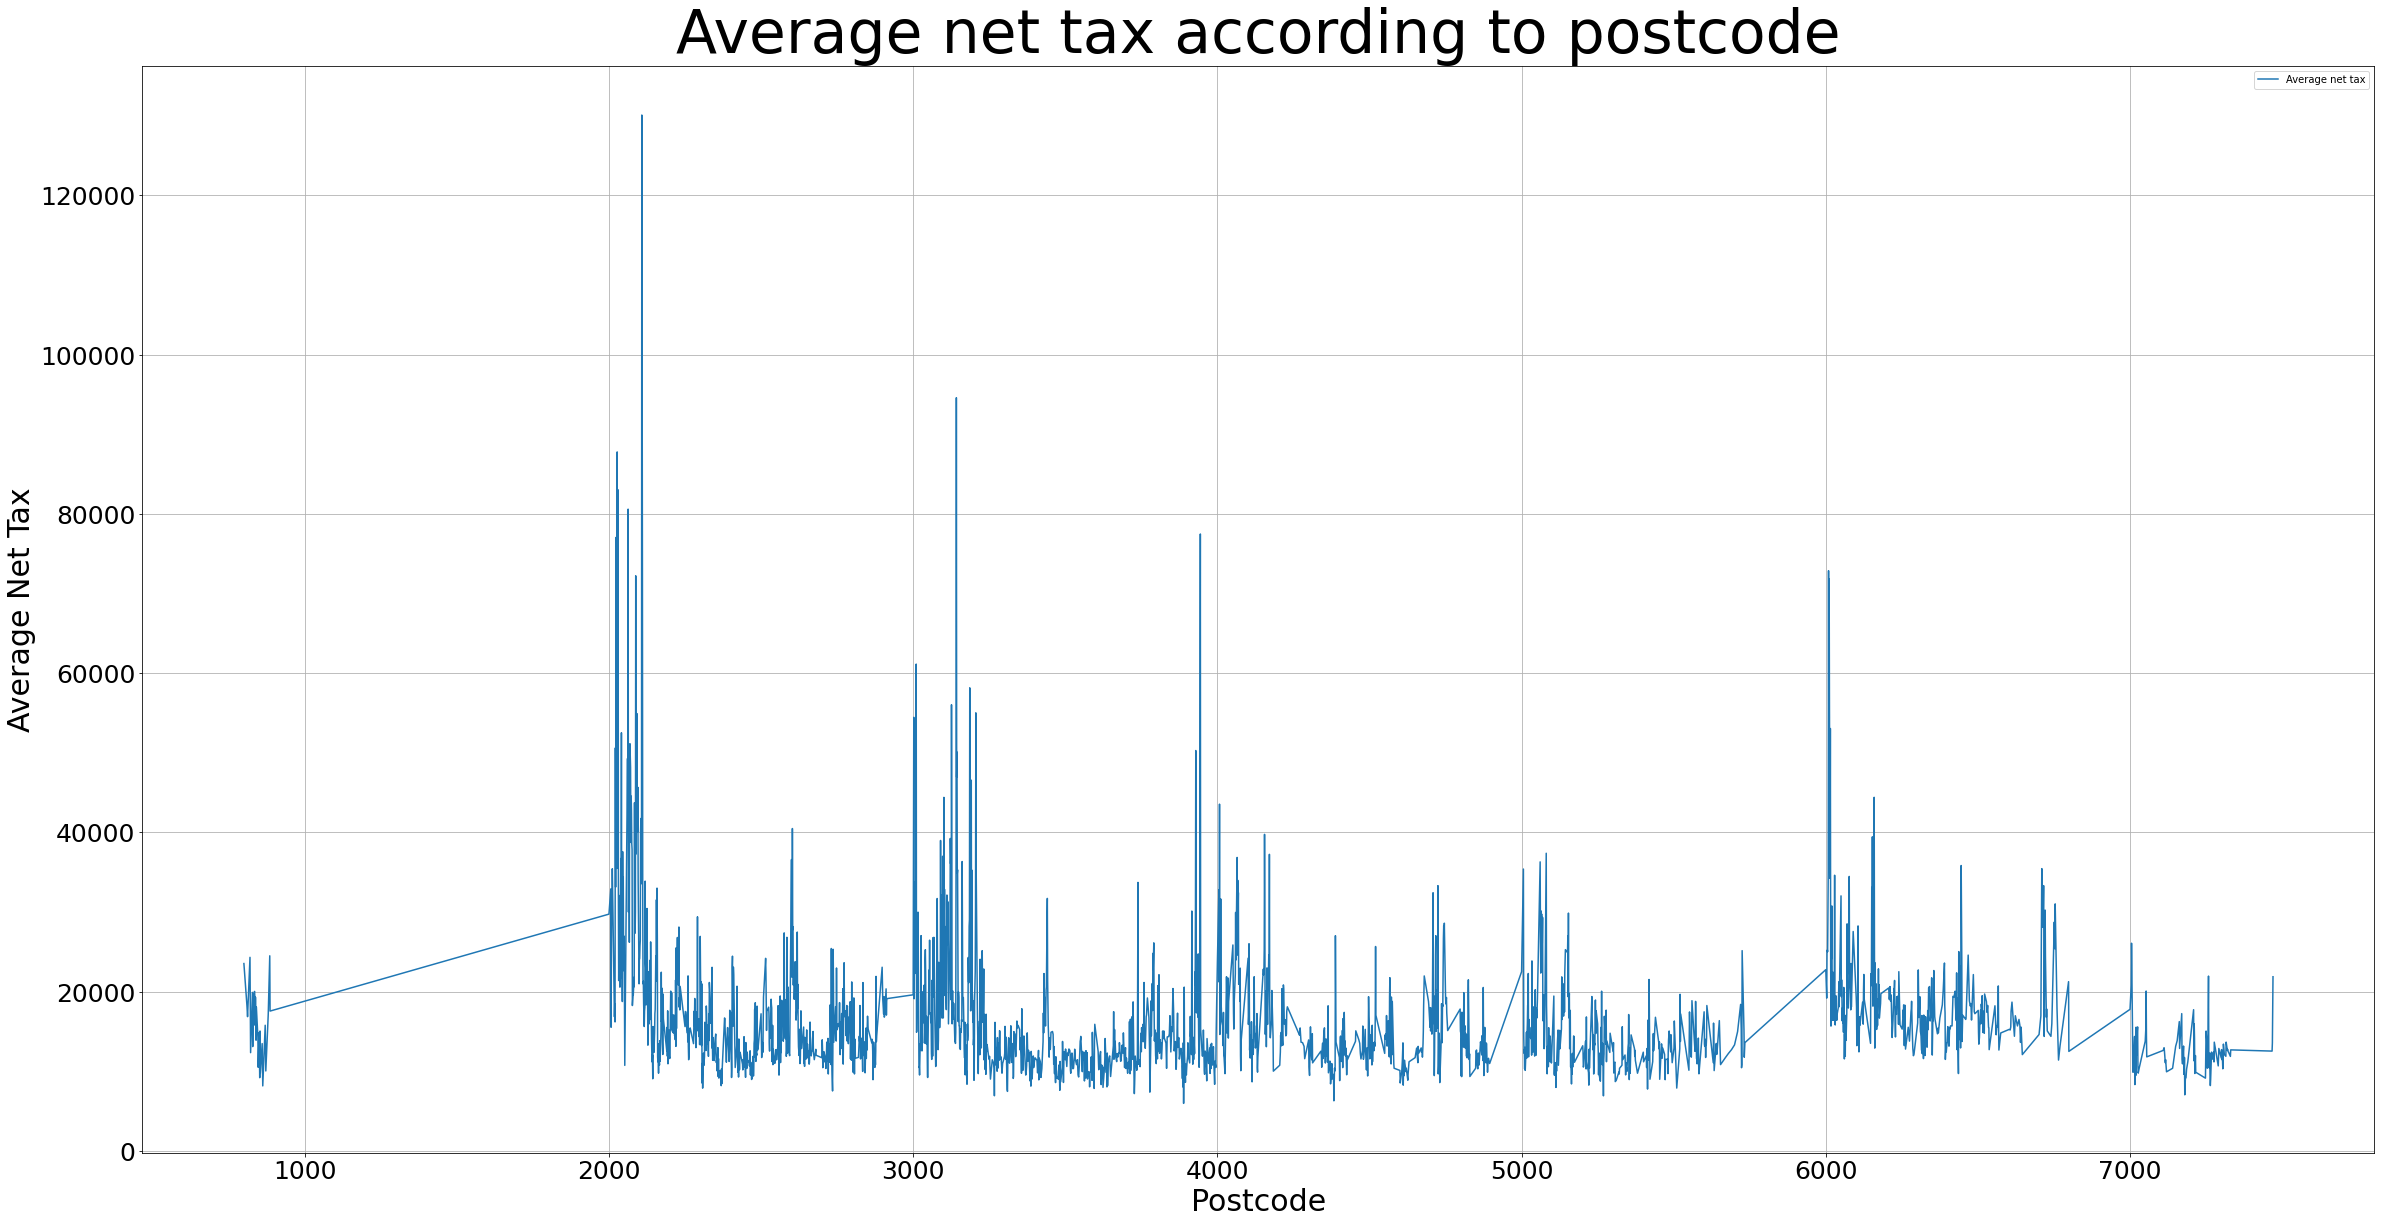

In [45]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average net tax', figsize=(40,20), grid=True)
plt.title('Average net tax according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Net Tax")

In [46]:
average_net_tax = data[['Postcode','Average net tax']]
average_net_tax.sort_values(by=['Average net tax']).head(10)

Postcode  Average net tax
1248      3889             5955
1494      4383             6275
1907      5269             6903
877       3267             6911
2413      7180             7029
1144      3727             7181
1178      3778             7367
907       3310             7459
543       2735             7515
1009      3482             7596

In [47]:
average_net_tax.sort_values(by=['Average net tax']).tail(10)

Postcode  Average net tax
100       2088            72216
2054      6009            72854
119       2110            73076
44        2023            77032
1289      3944            77466
76        2063            80587
51        2030            83011
48        2027            87772
777       3142            94578
118       2108           130086

In [48]:
average_net_tax.sort_values(by=['Average net tax']).describe()

Postcode  Average net tax
count  2472.000000      2472.000000
mean   4094.410599     16437.457929
std    1496.667668      8387.214415
min     800.000000      5955.000000
25%    2839.750000     11866.500000
50%    3869.500000     14205.000000
75%    5165.250000     18098.500000
max    7470.000000    130086.000000

## Average net tax according to postcode sorted

Text(0, 0.5, 'Average Net Tax')

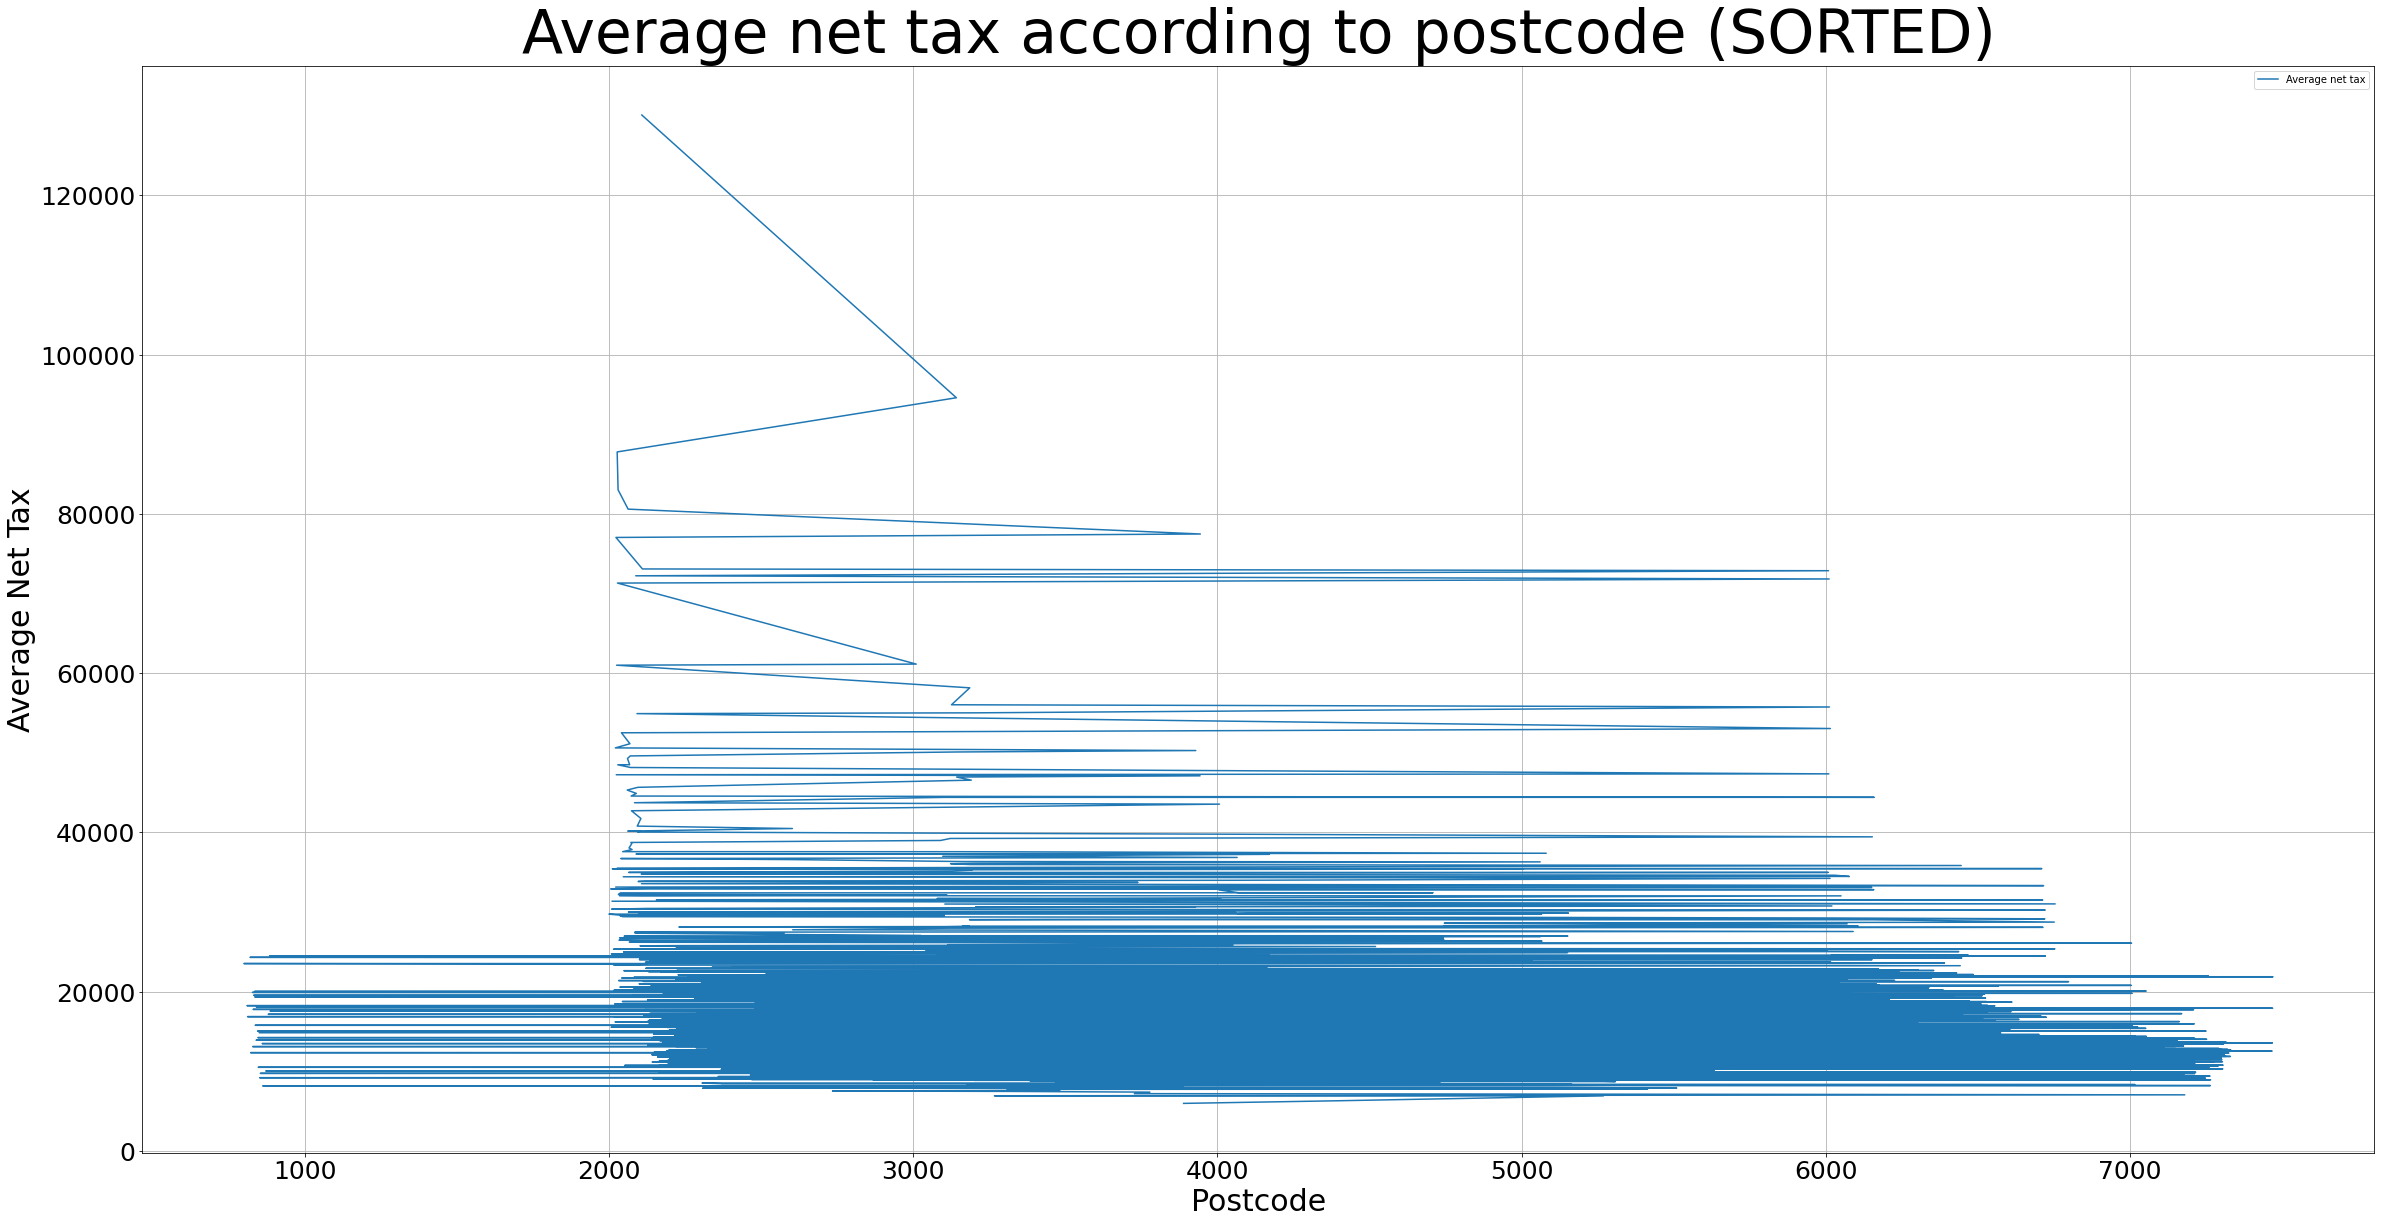

In [49]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_net_tax.sort_values(by=['Average net tax']).plot(x='Postcode', y='Average net tax', figsize=(40,20), grid=True)
plt.title('Average net tax according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Net Tax")

## Average total super member accounts balance according to postcode

Text(0, 0.5, 'Average Total Super Member Accounts Balance')

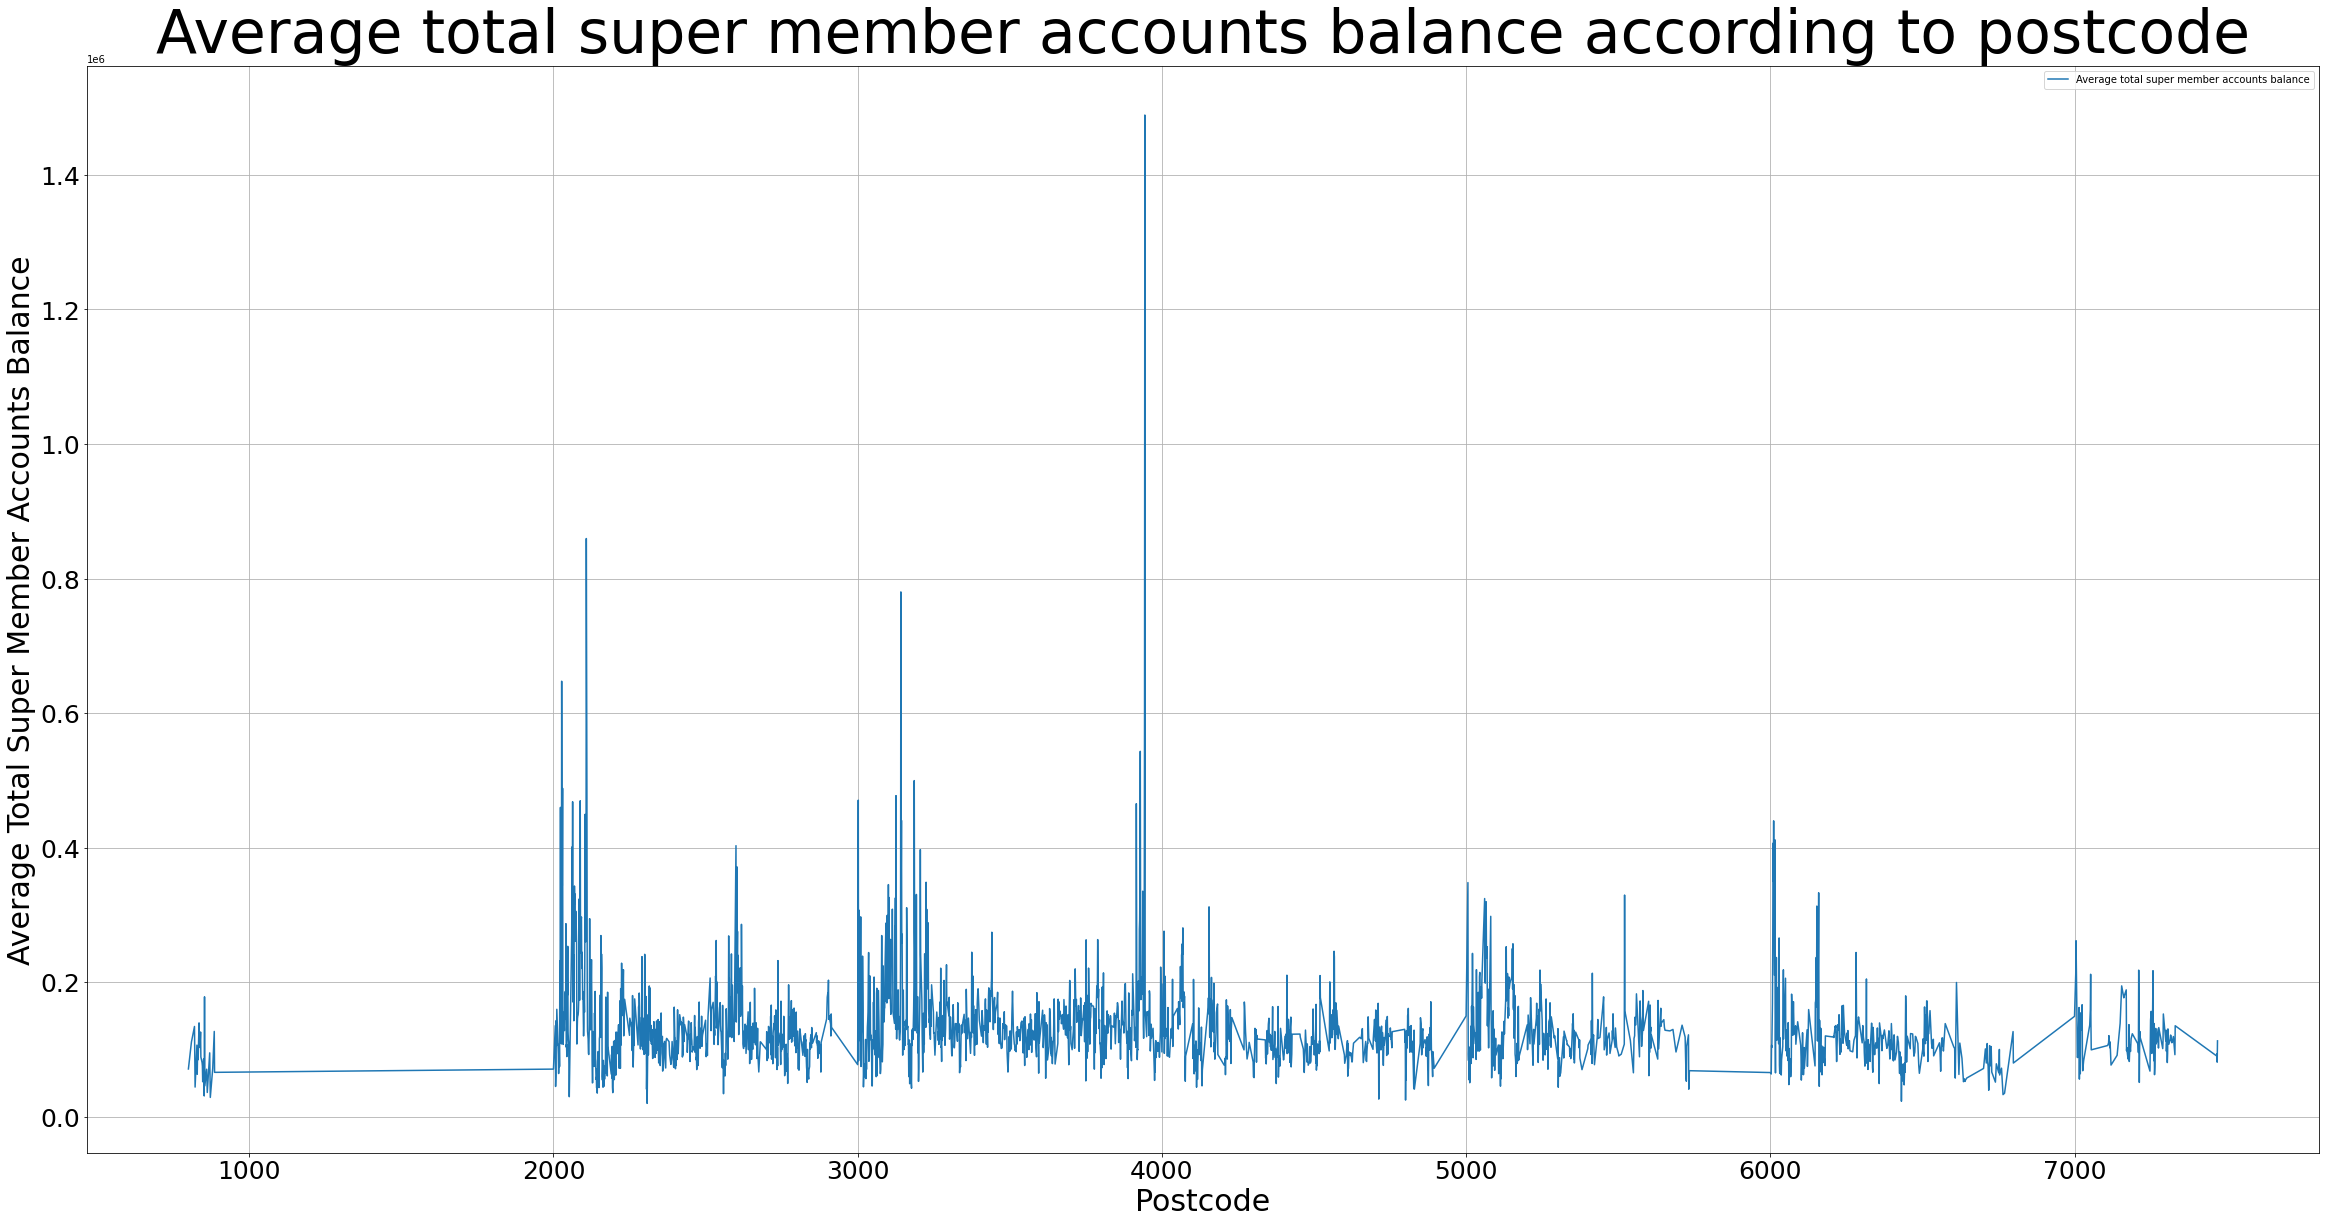

In [50]:
plt.rcParams['axes.labelsize'] = 30
lineplot = data.plot(x='Postcode', y='Average total super member accounts balance', figsize=(40,20), grid=True)
plt.title('Average total super member accounts balance according to postcode', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Super Member Accounts Balance")

In [51]:
average_total_super_member_accounts_balance = data[['Postcode','Average total super member accounts balance']]
average_total_super_member_accounts_balance.sort_values(by=['Average total super member accounts balance']).head(10)

Postcode  Average total super member accounts balance
266       2308                                        20205
2274      6431                                        23384
1672      4801                                        25151
1634      4713                                        26582
25         872                                        29060
72        2052                                        30094
19         852                                        31236
2362      6765                                        33228
429       2559                                        34560
2363      6770                                        35319

In [52]:
average_total_super_member_accounts_balance.sort_values(by=['Average total super member accounts balance']).tail(10)

Postcode  Average total super member accounts balance
761       3126                                       477524
119       2110                                       481387
51        2030                                       488436
818       3186                                       499869
1276      3929                                       543398
1288      3943                                       594278
48        2027                                       647555
777       3142                                       780243
118       2108                                       859572
1289      3944                                      1488929

In [53]:
average_total_super_member_accounts_balance.sort_values(by=['Average total super member accounts balance']).describe()

Postcode  Average total super member accounts balance
count  2472.000000                                 2.472000e+03
mean   4094.410599                                 1.321937e+05
std    1496.667668                                 6.824984e+04
min     800.000000                                 2.020500e+04
25%    2839.750000                                 9.726925e+04
50%    3869.500000                                 1.195125e+05
75%    5165.250000                                 1.492238e+05
max    7470.000000                                 1.488929e+06

## Average total super member accounts balance according to postcode sorted

Text(0, 0.5, 'Average Total Super Member Accounts Balance')

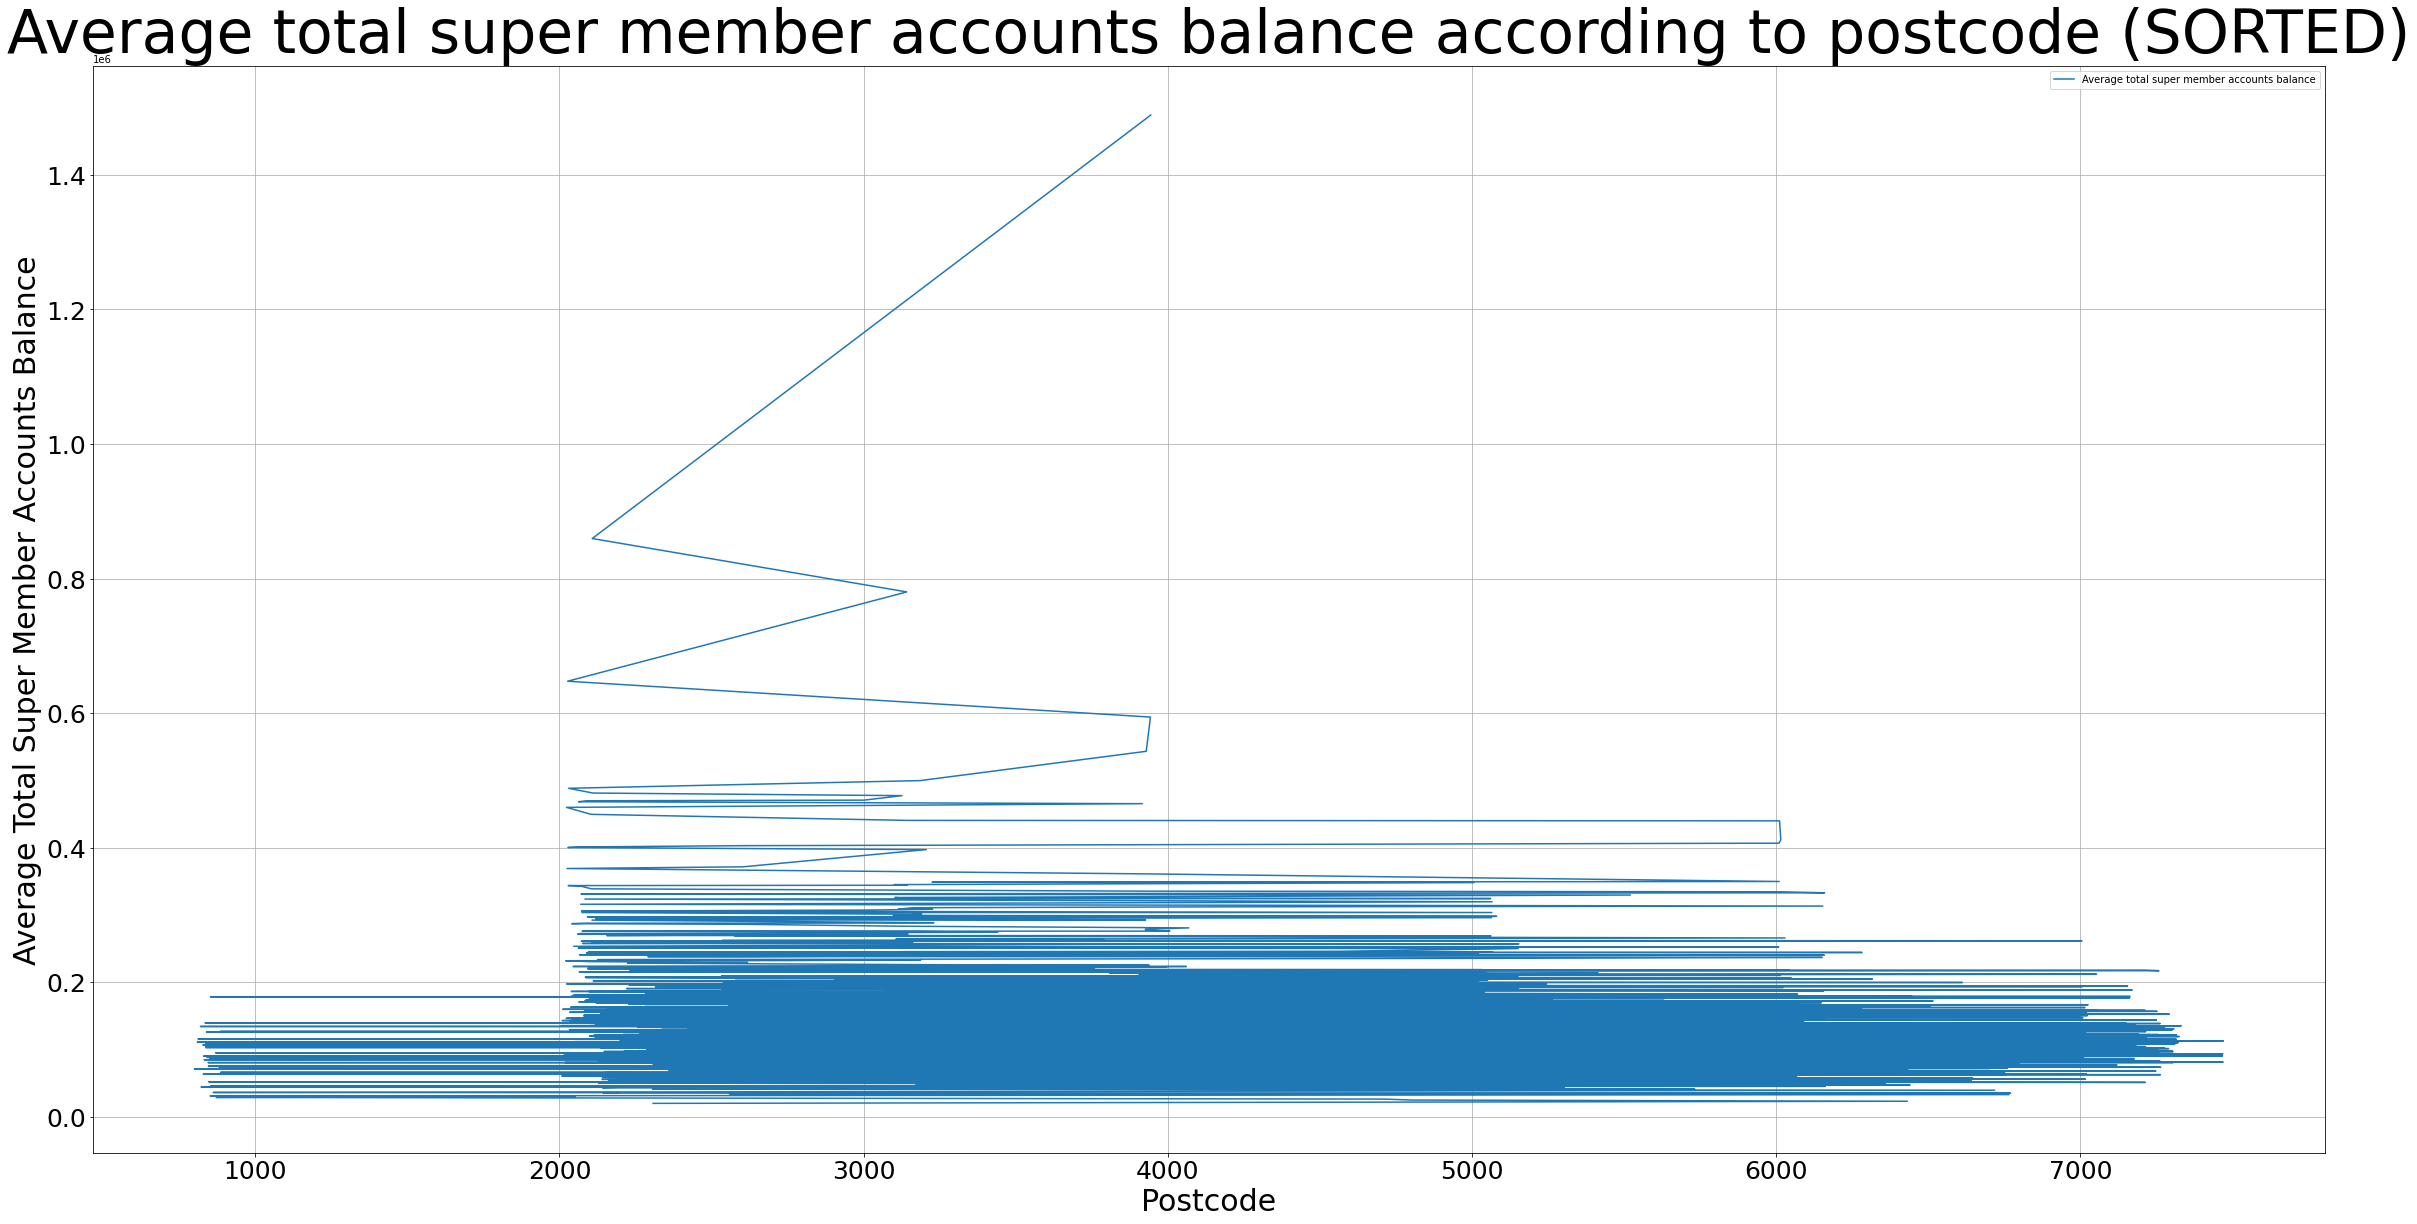

In [54]:
plt.rcParams['axes.labelsize'] = 30
lineplot = average_total_super_member_accounts_balance.sort_values(by=['Average total super member accounts balance']).plot(x='Postcode', y='Average total super member accounts balance', figsize=(40,20), grid=True)
plt.title('Average total super member accounts balance according to postcode (SORTED)', fontsize=60)
plt.tick_params(axis='both', labelsize=25)
lineplot.set_ylabel("Average Total Super Member Accounts Balance")

## What is the relationship between postcode and other fields?

## Logistical Regression model based on the "Count net tax"

In [55]:
train, test = train_test_split(data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(1977, 34)
(495, 34)


In [56]:
X_train = train.drop(['Count total business expenses','Average total business expenses','Proportion with total business expenses','Median total business income','Average total business income', 'Count total business income', 'Proportion with total business income','Median net rent', 'Proportion with net rent','Median total business expenses','Count net rent'], axis=1)
y_train = train['Count net tax']

X_test = train.drop(['Count total business expenses','Average total business expenses','Proportion with total business expenses','Median total business income','Average total business income', 'Count total business income', 'Proportion with total business income','Median net rent', 'Proportion with net rent','Median total business expenses','Count net rent'], axis=1)
y_test = train['Count net tax']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1977, 23)
y_train shape:  (1977,)
X_test shape:  (1977, 23)
y_test shape:  (1977,)


In [57]:
X_train

Postcode  Number of individuals lodging an income tax return  \
1371      4109                                              23150    
248       2289                                              11526    
858       3232                                                776    
2249      6375                                                641    
1626      4702                                              14977    
...        ...                                                ...    
2221      6320                                                360    
1050      3563                                                448    
511       2669                                                953    
2459      7310                                              14450    
277       2322                                              10656    

      Count taxable income or loss  Average taxable income or loss  \
1371                         23150                           45579   
248                          11526                           58322   
858                            776                           60121   
2249                           641                           56289   
1626                         14977                           53584   
...                            ...                             ...   
2221                           360                           54001   
1050                           448                           35843   
511                            953                           46305   
2459                         14450                           45986   
277                          10656                           53921   

      Median taxable income or loss  Proportion with salary or wages  \
1371                          33000                             0.73   
248                           46812                             0.80   
858                           36680                             0.60   
2249                          45920                             0.60   
1626                          43694                             0.79   
...                             ...                              ...   
2221                          47546                             0.57   
1050                          31992                             0.70   
511                           37269                             0.56   
2459                          38488                             0.80   
277                           46146                             0.85   

      Count salary or wages  Average salary or wages  Median salary or wages  \
1371                  16793                    46409                   38684   
248                    9222                    60919                   52809   
858                     467                    41853                   35941   
2249                    386                    49461                   43478   
1626                  11773                    59088                   50254   
...                     ...                      ...                     ...   
2221                    205                    45449                   41431   
1050                    315                    40667                   39120   
511                     534                    38641                   36042   
2459                  11567                    46530                   42060   
277                    9094                    56408                   50666   

      Average net rent  ...  Count total deductions  Average total deductions  \
1371              -124  ...                   23150                      1935   
248               -273  ...                   11526                      2370   
858               2786  ...                     776                      3371   
2249              -904  ...                     641                      2945   
1626             -2668  ...                   14977                      2253   
...         

In [58]:
model = LogisticRegression(solver='saga',max_iter=5000)

In [59]:
model.fit(X_train, y_train)

C:\Users\luker\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=5000, solver='saga')

In [60]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_test[:10])

[19251  7743   208    77 13797   117  7710   191 13797   191]


## Evaluation of logistical regression model

#### Accuracy test

In [61]:
print("Accuracy of training data: ", accuracy_score(y_train,y_hat_train))
print("Accuracy of test data: ", accuracy_score(y_test,y_hat_test))

Accuracy of training data:  0.05968639352554375
Accuracy of test data:  0.05968639352554375


#### Correlation coefficient

In [62]:
scipy.stats.pearsonr(y_test, y_hat_test)[0]

0.9420355646287222

In [63]:
scipy.stats.pearsonr(y_train, y_hat_train)[0]

0.9420355646287222

## Logistical Regression model based on "Average net tax"

In [64]:
LR = data.drop(['Count taxable income or loss', 'Median taxable income or loss', 'Proportion with salary or wages', 'Count salary or wages', 'Median salary or wages', 'Proportion with net rent', 'Count net rent', 'Median net rent', 'Count total income or loss', 'Median total income or loss', 'Count total deductions', 'Median total deductions', 'Proportion with total business income', 'Count total business income', 'Median total business income', 'Proportion with total business expenses', 'Count total business expenses', 'Median total business expenses', 'Proportion with net tax', 'Count net tax', 'Median net tax', 'Count total super member accounts balance', 'Median total super member accounts balance'], axis=1)
LR.head()

Postcode  Number of individuals lodging an income tax return  \
0       800                                               5469    
1       810                                              21199    
2       812                                              11330    
3       820                                              12940    
4       822                                               5981    

   Average taxable income or loss  Average salary or wages  Average net rent  \
0                           75120                    76663             -6775   
1                           64240                    66038             -4538   
2                           62800                    65689             -4996   
3                           78787                    75917             -4351   
4                           46457                    44601             -4594   

   Average total income or loss  Average total deductions  \
0                         77621                      2455   
1                         66828                      2536   
2                         65148                      2300   
3                         81900                      3041   
4                         47864                      1332   

   Average total business income  Average total business expenses  \
0                          66794                            53482   
1                          93480                            66482   
2                          78605                            54295   
3                          84990                            53516   
4                          81568                            59281   

   Average net tax  Average total super member accounts balance  
0            23516                                        71340  
1            18229                                       111650  
2            16847                                       116002  
3            24297                                       134488  
4            12326                                        44426

In [65]:
train, test = train_test_split(LR, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(1977, 11)
(495, 11)


In [66]:
X_train = train.drop(['Average net tax'], axis=1)
y_train = train['Average net tax']

X_test = test.drop(['Average net tax'], axis=1)
y_test = test['Average net tax']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1977, 10)
y_train shape:  (1977,)
X_test shape:  (495, 10)
y_test shape:  (495,)


In [67]:
X_train

Postcode  Number of individuals lodging an income tax return  \
1371      4109                                              23150    
248       2289                                              11526    
858       3232                                                776    
2249      6375                                                641    
1626      4702                                              14977    
...        ...                                                ...    
2221      6320                                                360    
1050      3563                                                448    
511       2669                                                953    
2459      7310                                              14450    
277       2322                                              10656    

      Average taxable income or loss  Average salary or wages  \
1371                           45579                    46409   
248                            58322                    60919   
858                            60121                    41853   
2249                           56289                    49461   
1626                           53584                    59088   
...                              ...                      ...   
2221                           54001                    45449   
1050                           35843                    40667   
511                            46305                    38641   
2459                           45986                    46530   
277                            53921                    56408   

      Average net rent  Average total income or loss  \
1371              -124                         47583   
248               -273                         60752   
858               2786                         63633   
2249              -904                         59345   
1626             -2668                         56910   
...                ...                           ...   
2221             -1216                         59761   
1050              -911                         38592   
511               3506                         50801   
2459               -72                         47977   
277              -2142                         56283   

      Average total deductions  Average total business income  \
1371                      1935                          87961   
248                       2370                          90760   
858                       3371                         113953   
2249                      2945                         152374   
1626                      2253                         119610   
...                        ...                            ...   
2221                      4536                         108026   
1050                      2355                          78762   
511                       3348                         181691   
2459                      1897                          79684   
277                       2331                          80194   

      Average total business expenses  \
1371                            75544   
248                             59962   
858                             87492   
2249                           129531   
1626                           102035   
...                               ...   
2221                            74254   
1050                            74231   
511                            161218   
2459                            60933   
277                             61981   

      Average total super member accounts balance  
1371                                       106464  
248                                        147727  
858                                        252562  
2249                                       129340  
1626                                       112869  
...                                           ...  
2221                                       109299  
1050                 

In [68]:
model = LogisticRegression(solver='saga',max_iter=5000)

In [69]:
model.fit(X_train, y_train)

C:\Users\luker\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=5000, solver='saga')

In [70]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

## Evaluation of logistical regression model

#### Accuracy test

In [71]:
print("Accuracy of training data: ", accuracy_score(y_train, pred_train))
print("Accuracy of test data: ", accuracy_score(y_test, pred_test))

Accuracy of training data:  0.09408194233687406
Accuracy of test data:  0.0


#### Correlation coefficient

In [72]:
scipy.stats.pearsonr(y_test, pred_test)[0]

0.5824189785756793

In [73]:
scipy.stats.pearsonr(y_train, pred_train)[0]

0.5831581676299419


# Conclusion
To summarise what we have learnt from our evaluation of the data set "Taxation based on postcodes" is that there is a very mixed basket of results and that there are some outliers that have a much higher average salary and wage and thus a higher amount of average tax paid by those outliers. From the first two plots, we can see that there is a very comparable difference between what people's average salaries are and the amount of tax that they pay. unsurprisingly the postcode with the highest salary is the one that is paying the most tax (postcode 3010) with an average salary of 141,262 dollars and an average tax of 61,126 dollars, but there are a lot of postcodes that earn a lot less and pay almost the same amount of tax as that of the highest-earning postcodes.